In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../Analysis_PSI_EPFL/Runs_15-10-20_J1h/'
results_foldername = 'Results_08-02-21'


filenamelist = ['KJ1Field_L2_MED_MEASFIELD_J1h_nsm16384_ncores8_J20_J30_J3st0_folder/backup',
                #'KJ1Field_L4_MED_MEASFIELD_J1h_nsm16384_ncores4_J20_J30_J3st0_folder/backup',
                'KJ1Field_L4_MED2_MEASFIELD_J1h_nsm16384_ncores8_J20_J30_J3st0_folder/backup',
                'KJ1Field_L8_MED_L8_MEASFIELD_J1h_nsm16384_ncores6_J20_J30_J3st0_folder/backup',
                'KJ1Field_MED_L12_Started_folder/backup',
                'KJ1Field_L16_MED_L16_RESTARTED2_MEASFIELD_J1h_nsm8192_ncores6_J20_J30_J3st0_folder/backup'
                
                
]

os.makedirs('./' + foldername + results_foldername, exist_ok = True)

n = len(filenamelist)

In [7]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh,
 stat_hfields, hfields_plots, listfunctions, sref, idswalker] = \
af.LoadParameters(foldername, filenamelist)

print(J3)
print(J4)
s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt)

n = len(L)
failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)])

kw = {'binning': False, 'plzplot': False, 'plotmin': 0, 'plotmax': 17, 'binning_level':0, 'RS': True}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq,  t_h_VarE, t_h_ErrVarE,C, ErrC,\
            t_h_S, t_h_Smin, t_h_SEmax, t_h_SE, t_h_SEmin, t_h_SEmax,MergedData] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
nb  [4096 4096 1024  128 1024] num_in_bin  [4, 4, 16, 64, 8]
Merge runs? False
Group runs by... 1
LoadEnergyFromRuns: nh  22
No jackknife analysis -- binning level:  0  -- number of bins:  4096
LoadEnergyFromRuns: VarE.shape  (32, 22)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  36
--temperatures (32, 1)
LoadEnergyFromRuns: C.shape  (32, 22)
(4096, 2, 32, 22)


/home/jeanne/Documents/Codes/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:749: UserWarning: Negative variances num error: 6.192115E-13
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (32, 22)
LoadEnergyFromRuns: nh  22
No jackknife analysis -- binning level:  0  -- number of bins:  4096
LoadEnergyFromRuns: VarE.shape  (32, 22)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (32, 1)
LoadEnergyFromRuns: C.shape  (32, 22)
(4096, 2, 32, 22)


/home/jeanne/Documents/Codes/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:749: UserWarning: Negative variances num error: 6.067740E-13
  warnings.warn("Negative variances num error: %E" % err)


CE: CoverT shape  (32, 22)
LoadEnergyFromRuns: nh  22
No jackknife analysis -- binning level:  0  -- number of bins:  1024
LoadEnergyFromRuns: VarE.shape  (32, 22)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  576
--temperatures (32, 1)
LoadEnergyFromRuns: C.shape  (32, 22)
(1024, 2, 32, 22)
CE: CoverT shape  (32, 22)
LoadEnergyFromRuns: nh  22
No jackknife analysis -- binning level:  0  -- number of bins:  128
LoadEnergyFromRuns: VarE.shape  (32, 22)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  1296
--temperatures (32, 1)
LoadEnergyFromRuns: C.shape  (32, 22)
(128, 2, 32, 22)
CE: CoverT shape  (32, 22)
LoadEnergyFromRuns: nh  22
No jackknife analysis -- binning level:  0  -- number of bins:  1024
LoadEnergyFromRuns: VarE.shape  (32, 22)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  2304
--temperatures (32, 1)
LoadEnergyFromRuns: C.shape  (32, 22)
(1024, 2, 32, 22)
CE: CoverT shape  (32, 22)
(32, 22)
Load

/home/jeanne/Documents/Codes/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:749: UserWarning: Negative variances num error: 7.112373E-14
  warnings.warn("Negative variances num error: %E" % err)
/home/jeanne/Documents/Codes/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:749: UserWarning: Negative variances num error: 8.951720E-15
  warnings.warn("Negative variances num error: %E" % err)
/home/jeanne/Documents/Codes/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:749: UserWarning: Negative variances num error: 7.556896E-14
  warnings.warn("Negative variances num error: %E" % err)


In [8]:
[t_h_MeanM, t_h_MeanMsq, t_h_varMeanM, t_h_varMeanMsq, Chi, ErrChi] = \
 af.LoadMagnetisation(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

In [ ]:
J3

In [ ]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

In [ ]:
print(' worms: ', failed[0][1,:])

print(' ssfs: ', failedssf[0][1,:])

In [ ]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failed, failedssf)

In [9]:
###########################################
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
### Energy

In [10]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jeanne/Documents/Codes/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

In [11]:
for i in range(0,nh[0]):
    print("h/J1 = ", hfields_plots[3][i], " -> E = ", t_h_MeanE[3][0,i])

h/J1 =  0.0  -> E =  -0.6666666666666683
h/J1 =  0.2  -> E =  -0.7314449734157982
h/J1 =  0.4  -> E =  -0.7965416425540114
h/J1 =  0.6000000000000001  -> E =  -0.8618912308304391
h/J1 =  0.8  -> E =  -0.9274967146508488
h/J1 =  1.0  -> E =  -0.9950501241801689
h/J1 =  1.2000000000000002  -> E =  -1.0666666666666644
h/J1 =  1.4000000000000001  -> E =  -1.1333333333333313
h/J1 =  1.6  -> E =  -1.1999999999999997
h/J1 =  1.8  -> E =  -1.2666666666666666
h/J1 =  2.0  -> E =  -1.3333333333333341
h/J1 =  2.2  -> E =  -1.4000000000000026
h/J1 =  2.4000000000000004  -> E =  -1.4666666666666683
h/J1 =  2.6  -> E =  -1.5333333333333317
h/J1 =  2.8000000000000003  -> E =  -1.599999999999996
h/J1 =  3.0  -> E =  -1.6664202654803215
h/J1 =  3.2  -> E =  -1.731924852912804
h/J1 =  3.4000000000000004  -> E =  -1.7984183982566548
h/J1 =  3.6  -> E =  -1.8650959532937912
h/J1 =  3.8000000000000003  -> E =  -1.932249959309899
h/J1 =  4.0  -> E =  -1.999999999999998
h/J1 =  4.2  -> E =  -2.20000000000003

In [ ]:
############################################
#        ## Energy ANALYSIS ##
############################################
### Energy
S0 = np.log(2)
kw = {'gscheck': False, 'ploth' : False}
for i in range(n):
    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                    results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                    t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
plt.show()

In [ ]:
############################################
#        ## MAGNETISATION ANALYSIS ##
############################################
for i in range(n):
    af.BasicPlotsM(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                    results_foldername, filenamelist, t_h_MeanM, t_h_MeanMsq, t_h_varMeanM,
                    t_h_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4, **kw)
plt.show()

In [20]:
rmmag = True
kw = {'rmmag':rmmag,'binning': True, 'plzplot':False}

In [21]:
t_h_MeanFc, t_h_varMeanFc= \
 af.LoadFirstCorrelations(foldername, filenamelist, listfunctions,stat_temps,
                          stat_hfields, nb,t_h_MeanM, t_h_varMeanMsq, **kw)

Binning...FirstCorrelations
 bins list for binning:  [4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
(4096, 32, 22, 4)
(4096, 32, 22, 4)
(2048, 32, 22, 4)
(1024, 32, 22, 4)
(512, 32, 22, 4)
(256, 32, 22, 4)
(128, 32, 22, 4)
(64, 32, 22, 4)
(32, 32, 22, 4)
(16, 32, 22, 4)
[3.13638004e-16 1.78638277e-06 1.55548265e-06 3.13684576e-06]
(32, 22, 4)
Binning...FirstCorrelations
 bins list for binning:  [4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
(4096, 32, 22, 4)
(4096, 32, 22, 4)
(2048, 32, 22, 4)
(1024, 32, 22, 4)
(512, 32, 22, 4)
(256, 32, 22, 4)
(128, 32, 22, 4)
(64, 32, 22, 4)
(32, 32, 22, 4)
(16, 32, 22, 4)
[3.13638004e-16 2.97598153e-07 2.51523632e-07 6.18852817e-07]
(32, 22, 4)
Binning...FirstCorrelations
 bins list for binning:  [1024, 512, 256, 128, 64, 32, 16]
(1024, 32, 22, 4)
(1024, 32, 22, 4)
(512, 32, 22, 4)
(256, 32, 22, 4)
(128, 32, 22, 4)
(64, 32, 22, 4)
(32, 32, 22, 4)
(16, 32, 22, 4)
[7.40148683e-17 1.11662687e-07 7.78958039e-08 1.35850672e-07]
(32, 22, 4)
Binning...FirstC

In [ ]:
#t_h_MeanSs, t_h_varMeanSs, t_h_MeanSi, t_h_varMeanSi, t_h_MeanCorr, t_h_errCorrEstim = \
# af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps, stat_hfields, nb, **kw)
#print(t_h_errCorrEstim[0].shape)

In [12]:
MTNdata30 = np.loadtxt(foldername +"Results_TNs_06-10-20/MagnetisationData_rh2_chi30.csv")
NNTNdata30 = np.loadtxt(foldername +"Results_TNs_06-10-20/CorrPlotNN_rh2_chi30.csv")
N2TNdata30 = np.loadtxt(foldername +"Results_TNs_06-10-20/CorrPlotN2_rh2_chi30.csv")
N3pTNdata30 = np.loadtxt(foldername +"Results_TNs_06-10-20/CorrPlotN3p_rh2_chi30.csv")
N3sTNdata30 = np.loadtxt(foldername +"Results_TNs_06-10-20/CorrPlotN3s_rh2_chi30.csv")

In [13]:
TTNdatah0 = np.loadtxt(foldername + "Results_TNs_10-01-21/TPlot_h0_chi56.csv", delimiter = ',')
TTNdatah0 = TTNdatah0[0:32];
MTNdatah0 = np.loadtxt(foldername +"Results_TNs_10-01-21/M_h0_chi80_chiEndLeq13.csv", delimiter = ',')
NNTNdatah0 = np.loadtxt(foldername +"Results_TNs_10-01-21/CorrPlotNN_h0_chi80_chiEndLeq13.csv", delimiter = ',')
N2TNdatah0 = np.loadtxt(foldername +"Results_TNs_10-01-21/CorrPlotN2_h0_chi80_chiEndLeq13.csv", delimiter = ',')
N3pTNdatah0 = np.loadtxt(foldername +"Results_TNs_10-01-21/CorrPlotN3p_h0_chi80_chiEndLeq13.csv", delimiter = ',')
N3sTNdatah0 = np.loadtxt(foldername +"Results_TNs_10-01-21/CorrPlotN3s_h0_chi80_chiEndLeq13.csv", delimiter = ',')

In [14]:
TTNdatah42 = np.loadtxt(foldername + "Results_Direct4T_J1hLines_14-01-21/resrunsList4.2_temps.csv", delimiter = ',')
#TTNdatah42 = TTNdatah0[0:32];
MTNdatah42 = np.loadtxt(foldername +"Results_Direct4T_J1hLines_14-01-21/resrunsList4.2_M.csv", delimiter = ',')
NNTNdatah42 = np.loadtxt(foldername +"Results_Direct4T_J1hLines_14-01-21/resrunsList4.2_NN.csv", delimiter = ',')
N2TNdatah42 = np.loadtxt(foldername +"Results_Direct4T_J1hLines_14-01-21/resrunsList4.2_N2.csv", delimiter = ',')
N3pTNdatah42 = np.loadtxt(foldername +"Results_Direct4T_J1hLines_14-01-21/resrunsList4.2_N3p.csv", delimiter = ',')
N3sTNdatah42 = np.loadtxt(foldername +"Results_Direct4T_J1hLines_14-01-21/resrunsList4.2_N3s.csv", delimiter = ',')

In [15]:
TTNdata = np.loadtxt(foldername + "Results_TNs_06-10-20/TemperaturesCorrPlot_rh2.csv")
MTNdata = np.loadtxt(foldername +"Results_TNs_06-10-20/MagnetisationData_rh2.csv")
NNTNdata = np.loadtxt(foldername +"Results_TNs_06-10-20/CorrPlotNN_rh2.csv")
N2TNdata = np.loadtxt(foldername +"Results_TNs_06-10-20/CorrPlotN2_rh2.csv")
N3pTNdata = np.loadtxt(foldername +"Results_TNs_06-10-20/CorrPlotN3p_rh2.csv")
N3sTNdata = np.loadtxt(foldername +"Results_TNs_06-10-20/CorrPlotN3s_rh2.csv")

In [16]:
TTNdatah4 = np.loadtxt(foldername + "Results_TNs_11-10-20/TemperaturesCorrPlot_rh4.csv")
MTNdatah4 = np.loadtxt(foldername +"Results_TNs_11-10-20/MagnetisationData_rh4.csv")
NNTNdatah4 = np.loadtxt(foldername +"Results_TNs_11-10-20/CorrPlotNN_rh4_chi56.csv")
N2TNdatah4 = np.loadtxt(foldername +"Results_TNs_11-10-20/CorrPlotN2_rh4_chi56.csv")
N3pTNdatah4 = np.loadtxt(foldername +"Results_TNs_11-10-20/CorrPlotN3p_rh4_chi56.csv")
N3sTNdatah4 = np.loadtxt(foldername +"Results_TNs_11-10-20/CorrPlotN3s_rh4_chi56.csv")

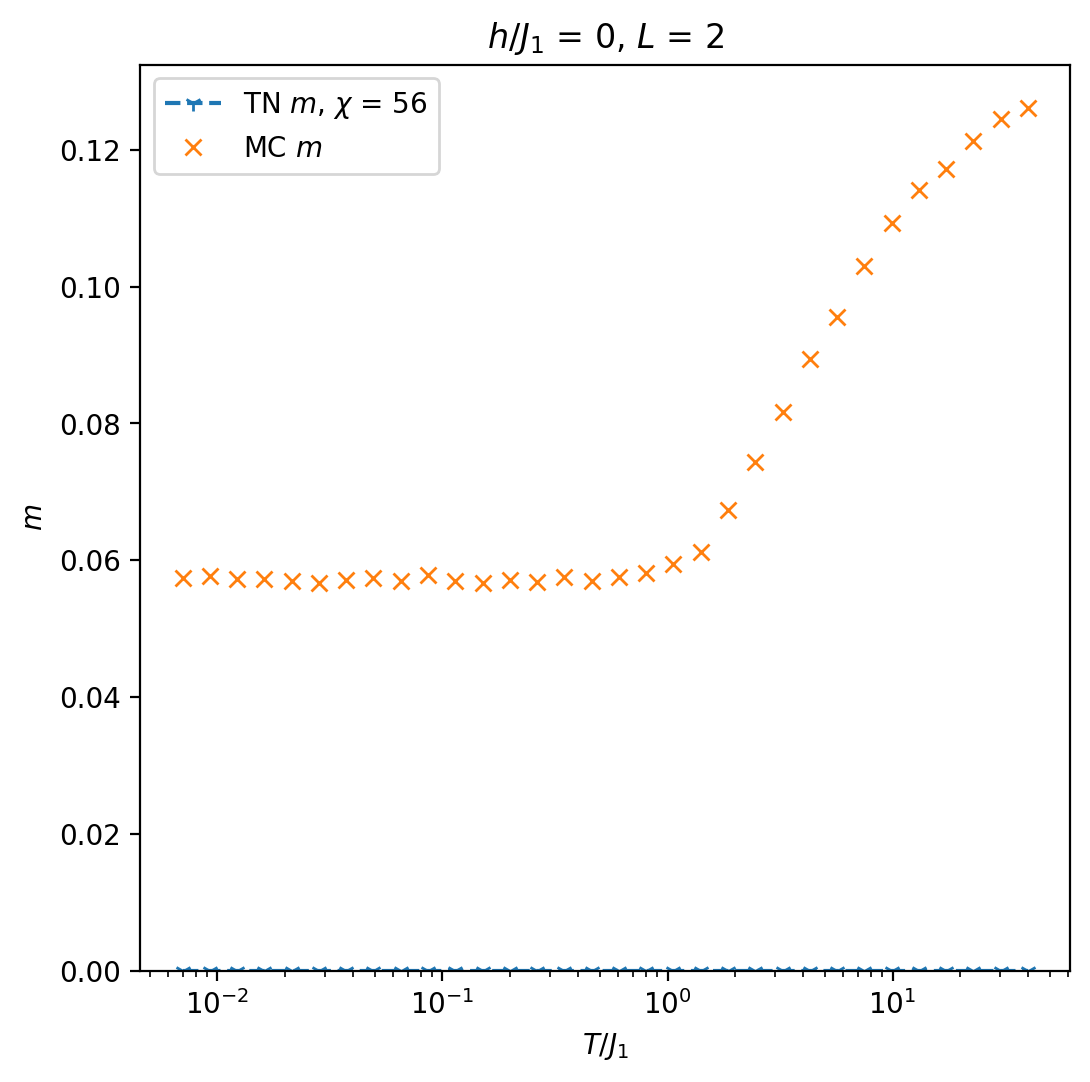

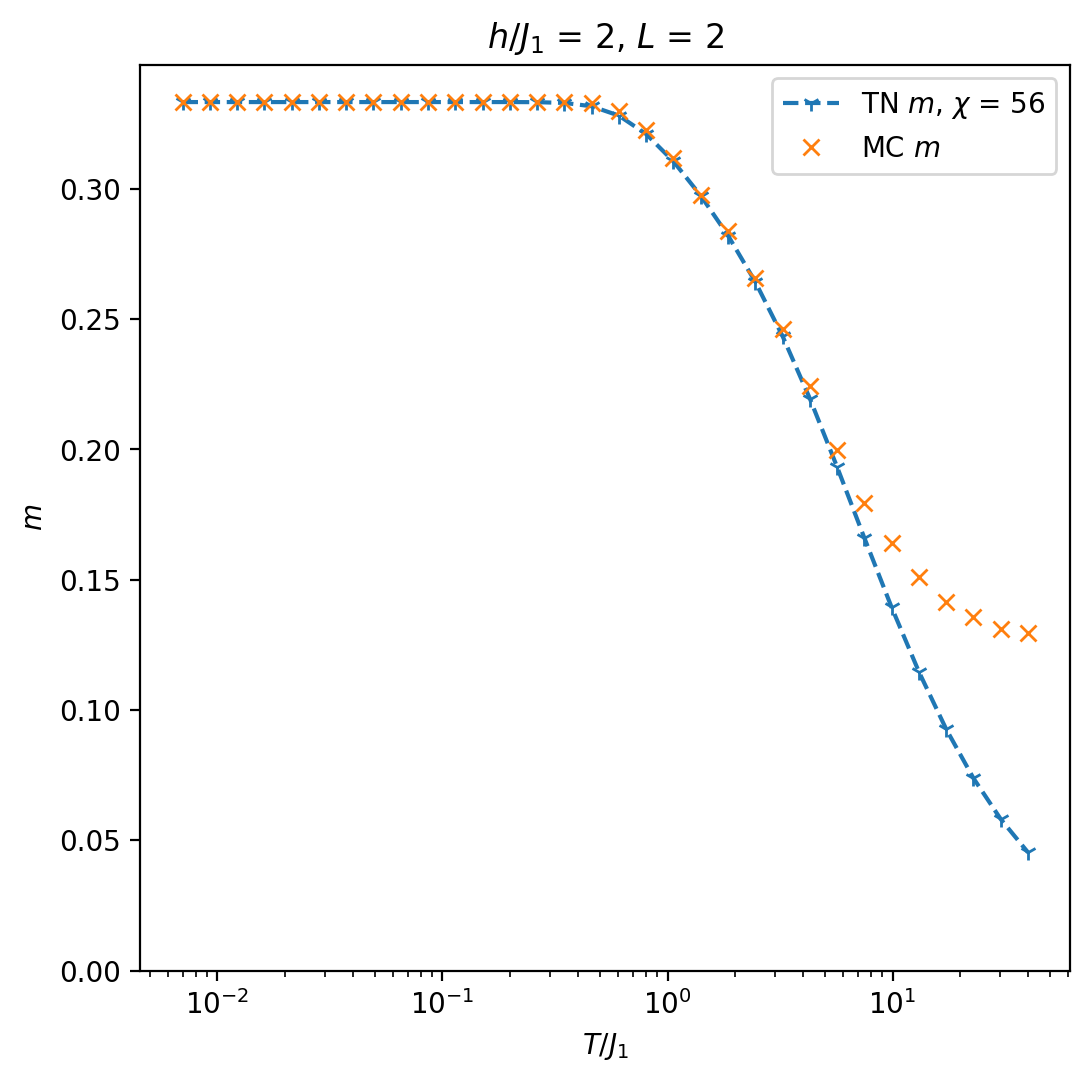

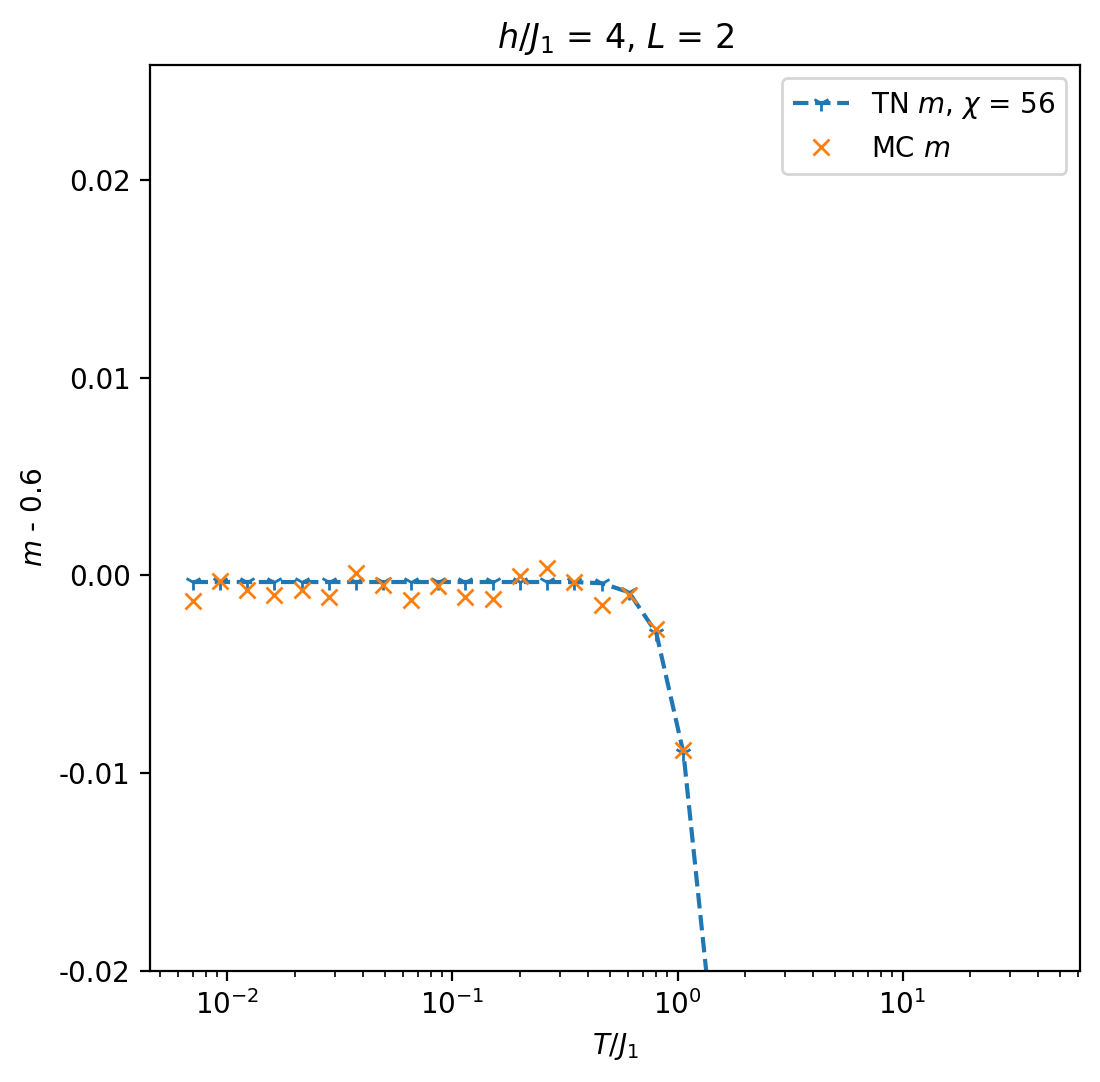

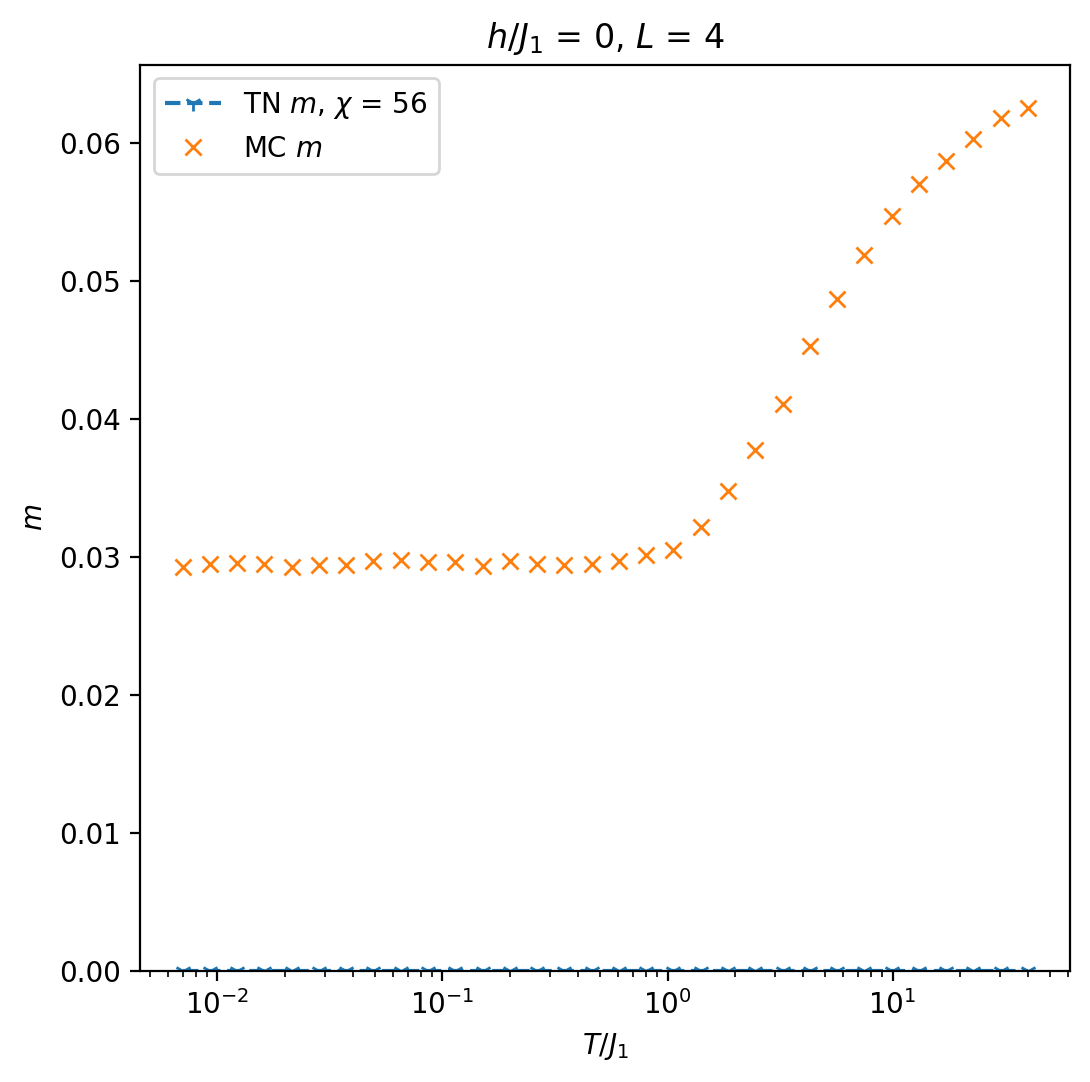

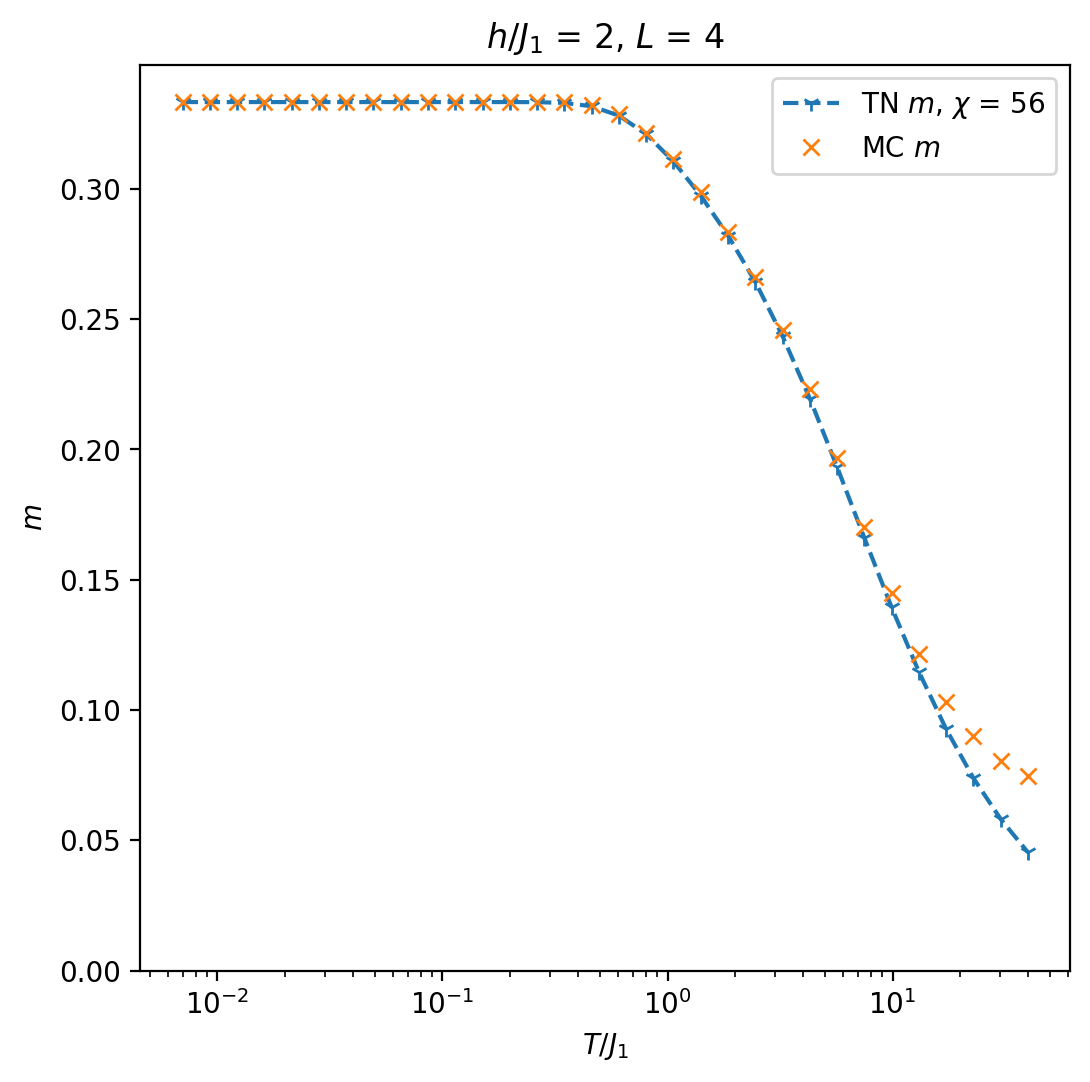

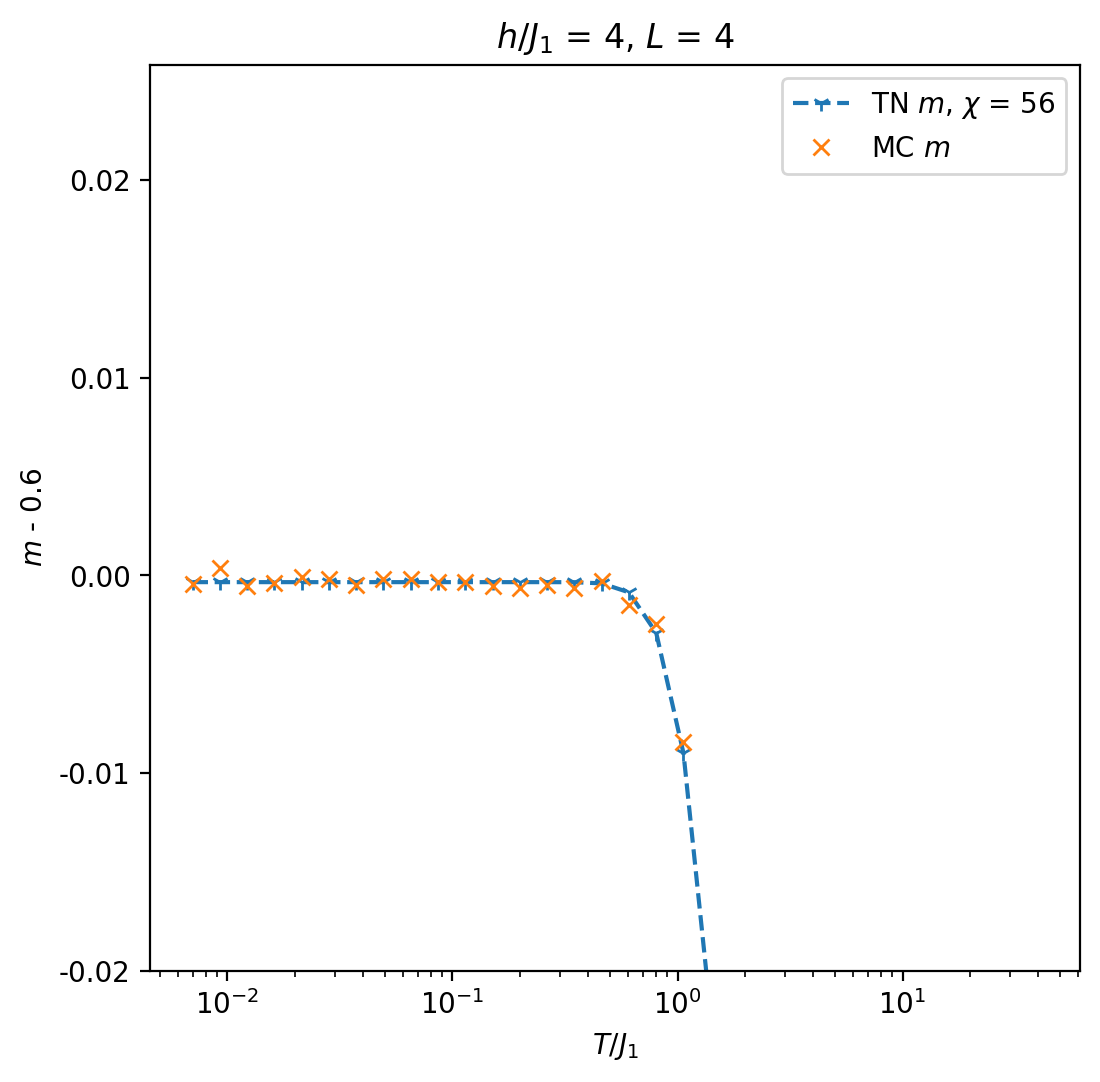

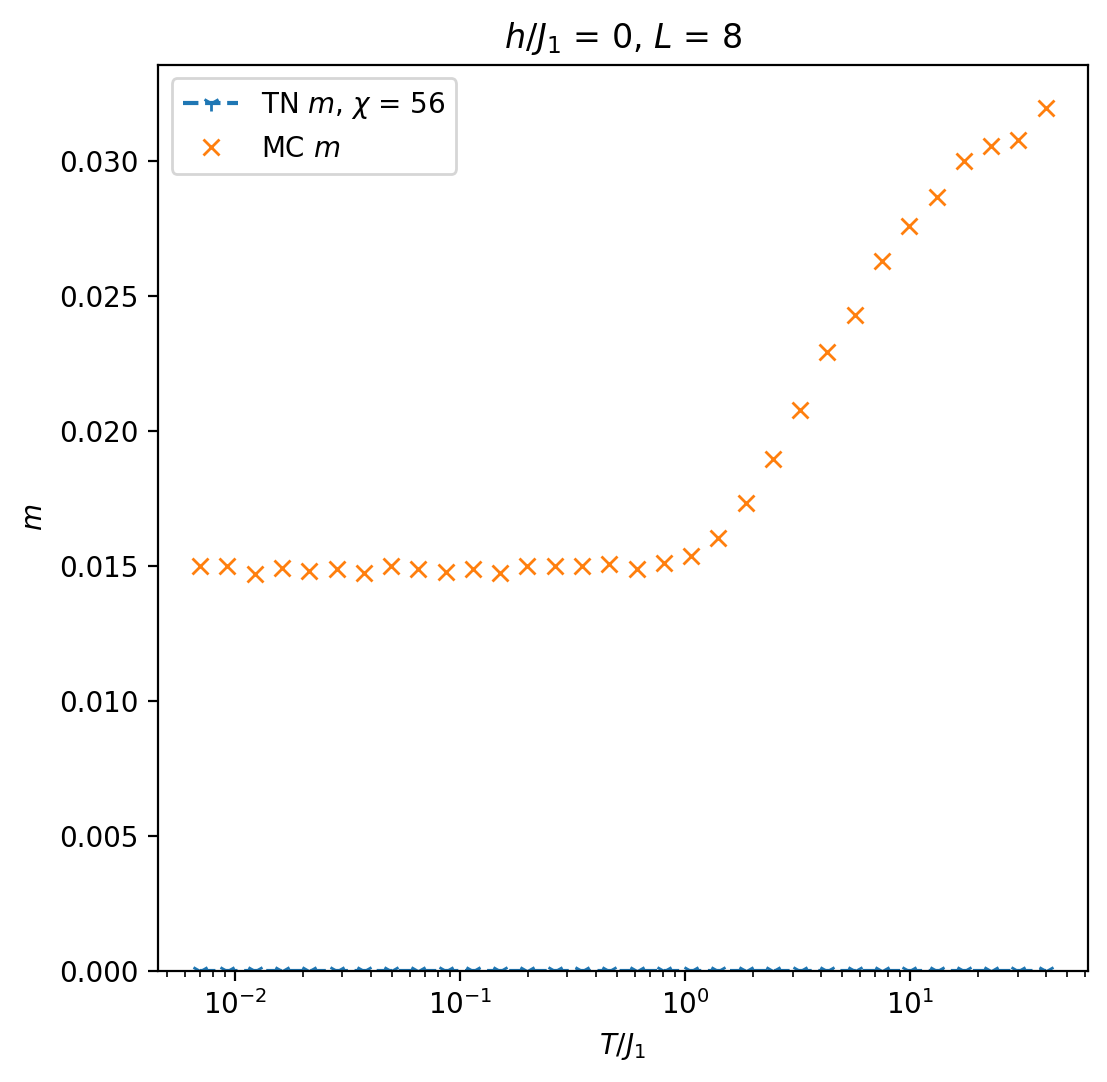

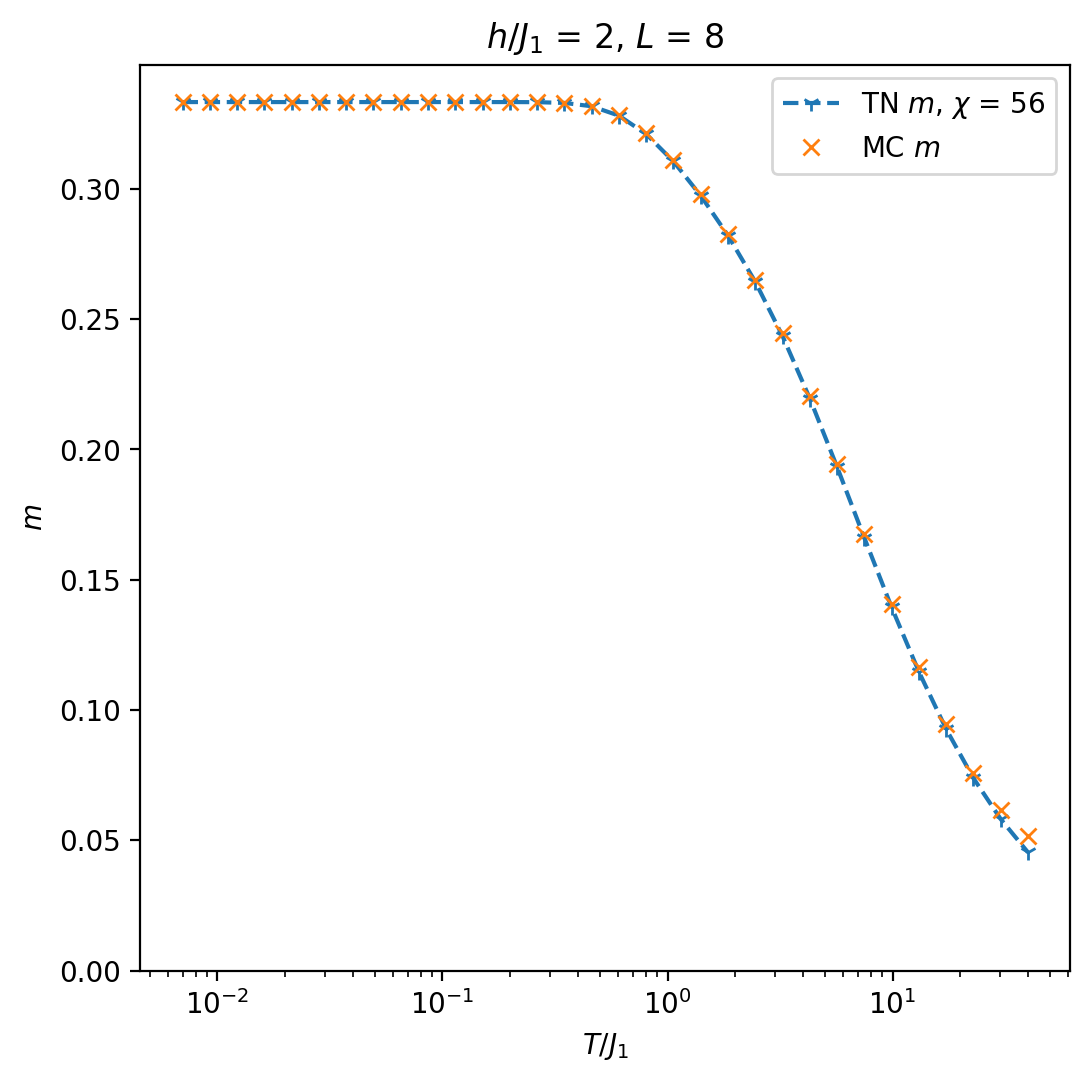

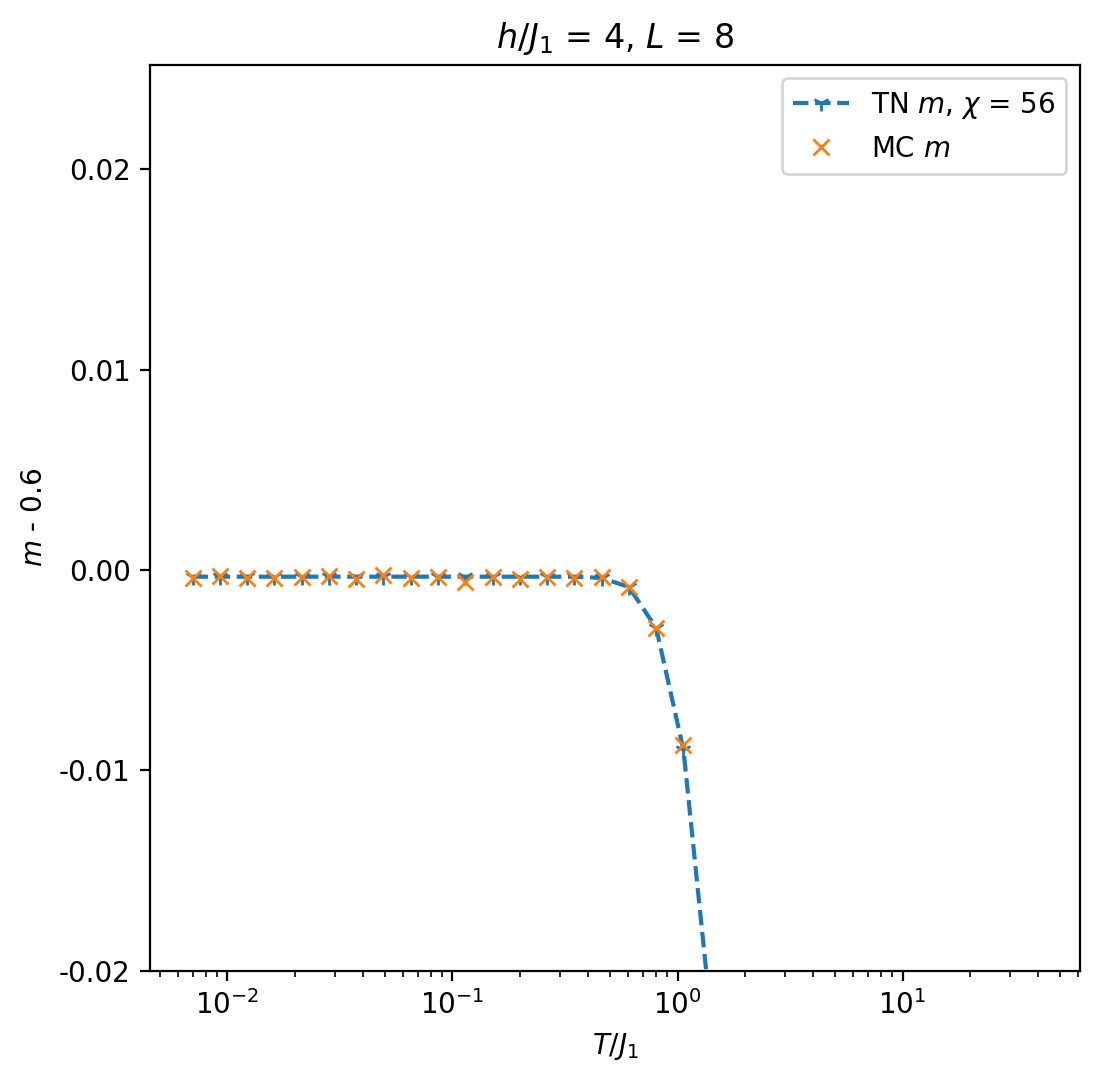

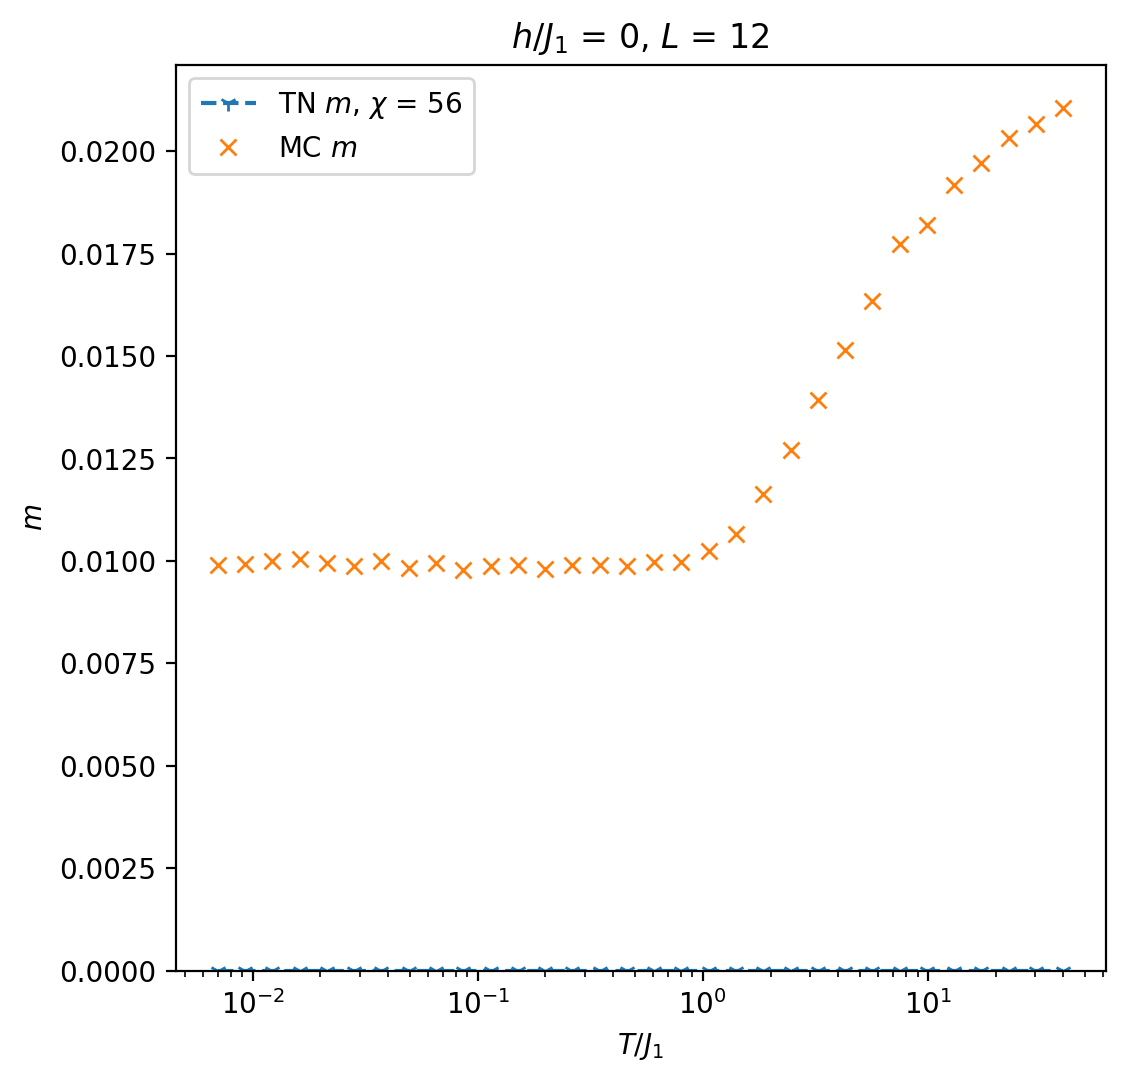

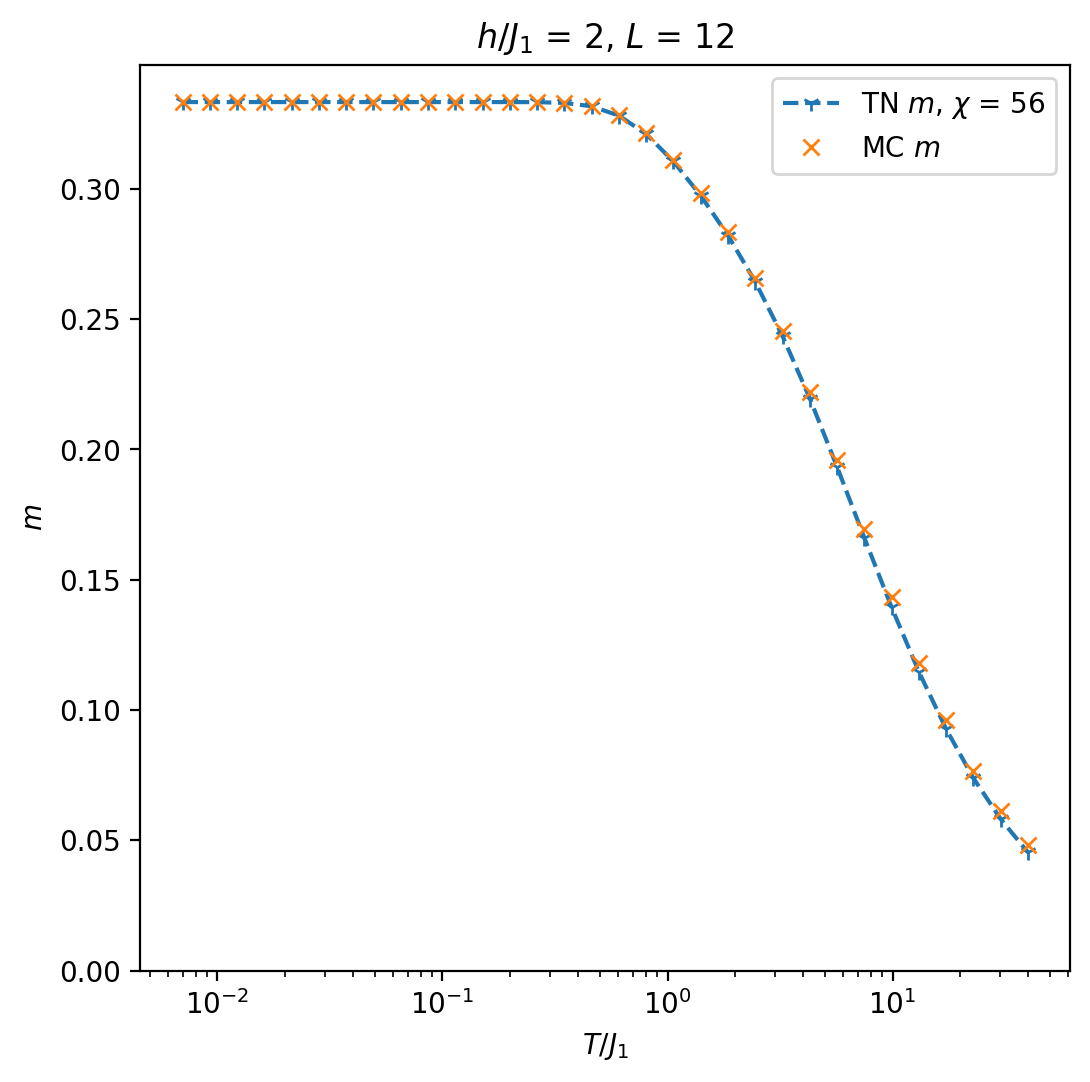

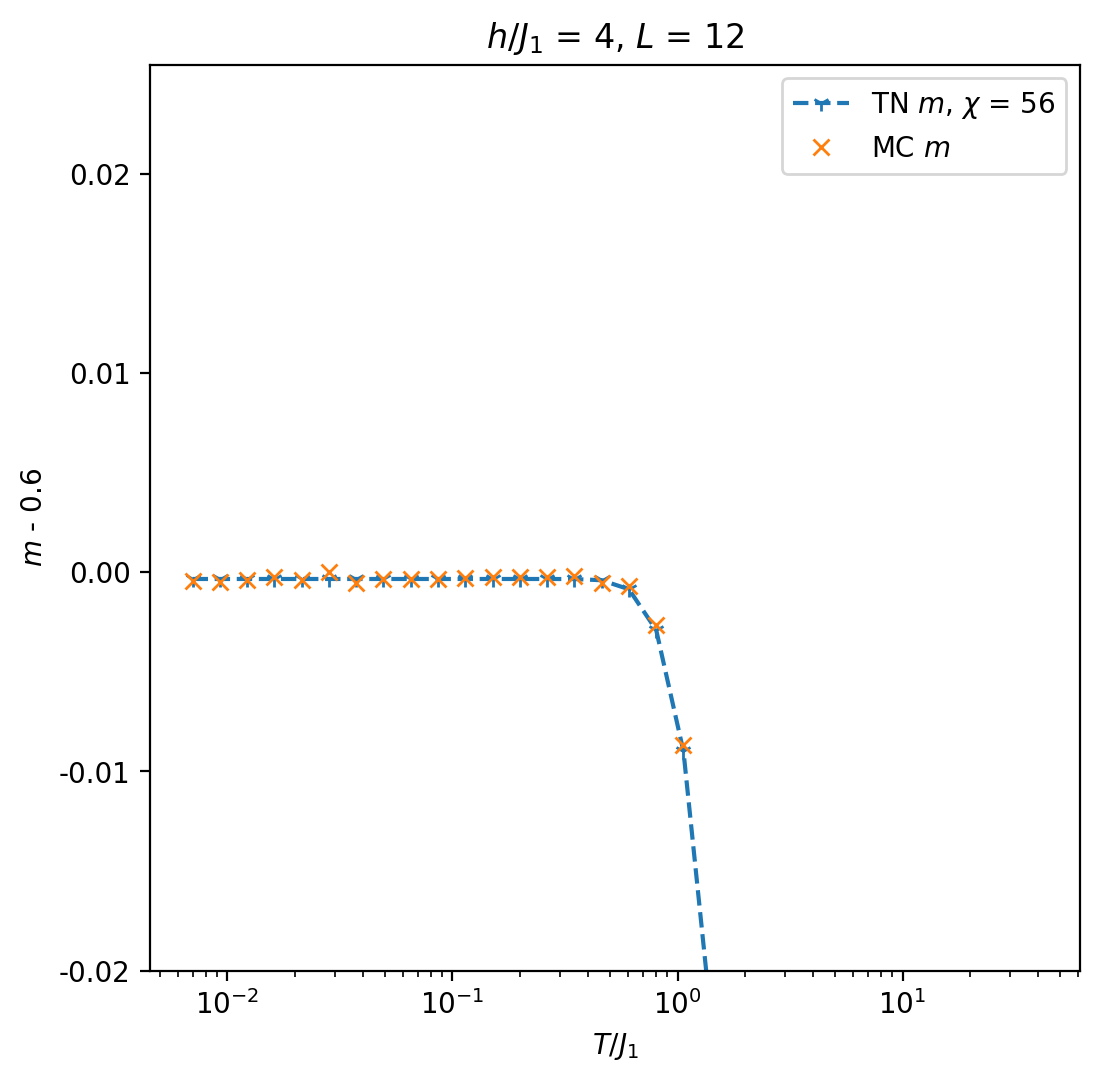

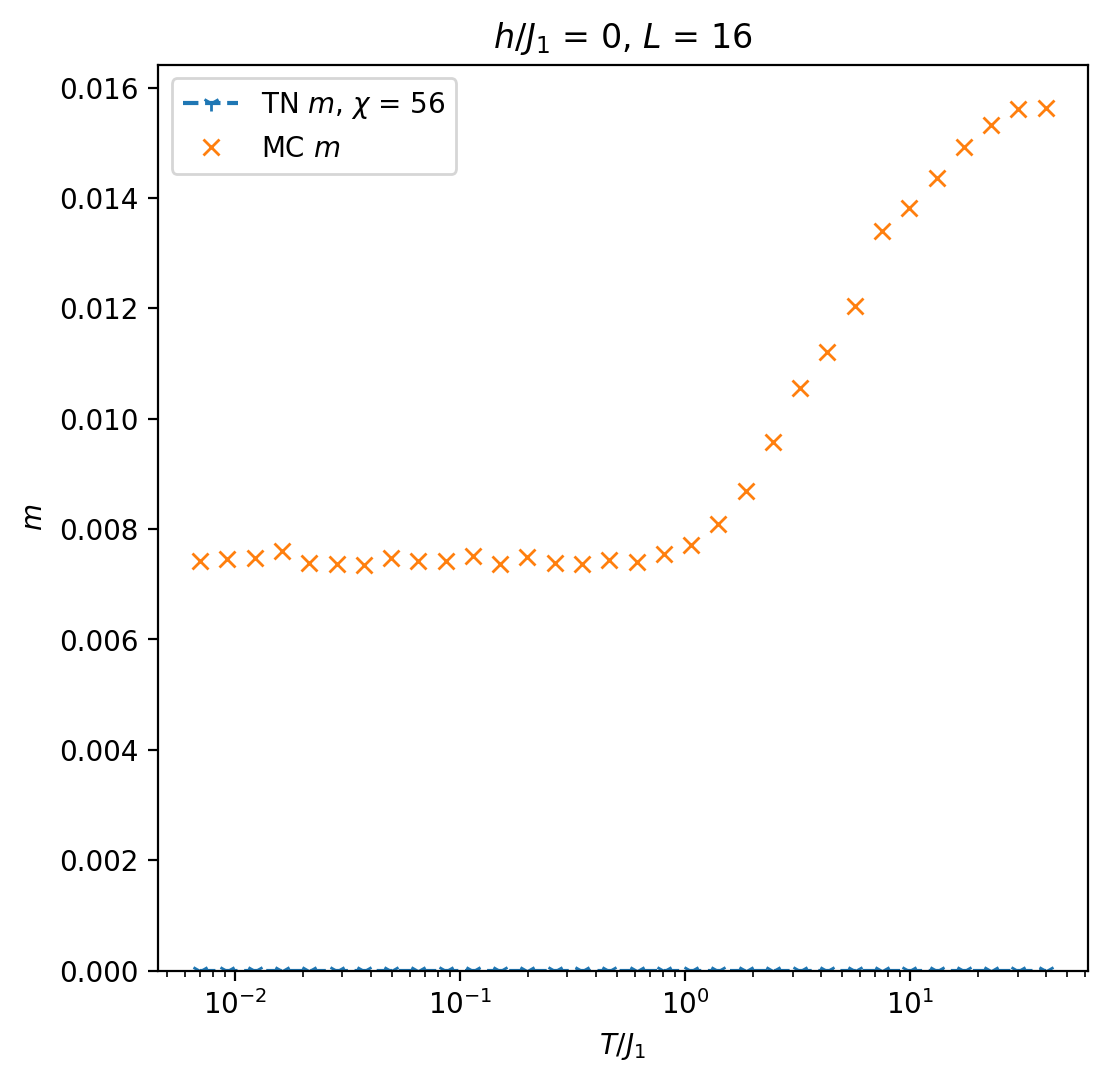

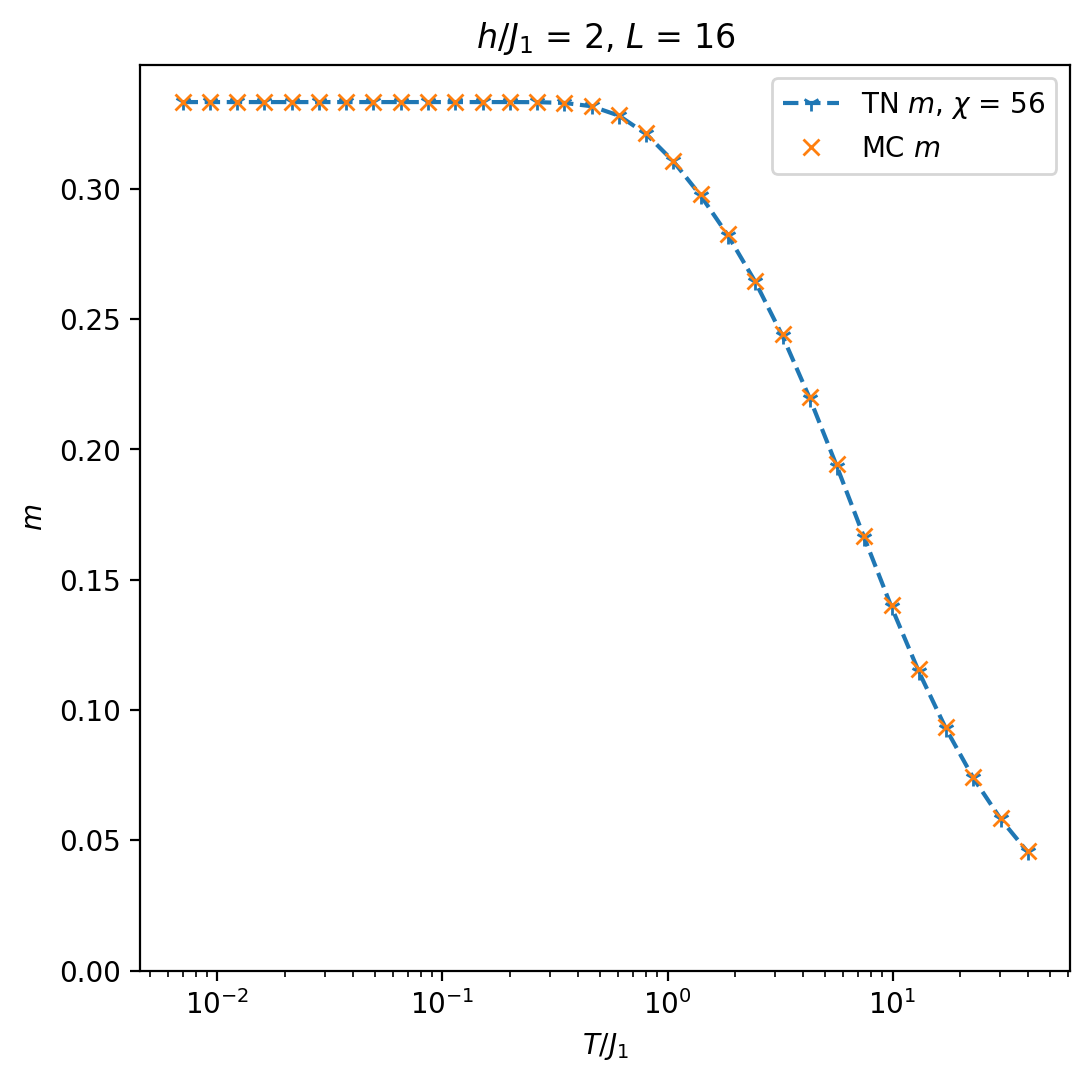

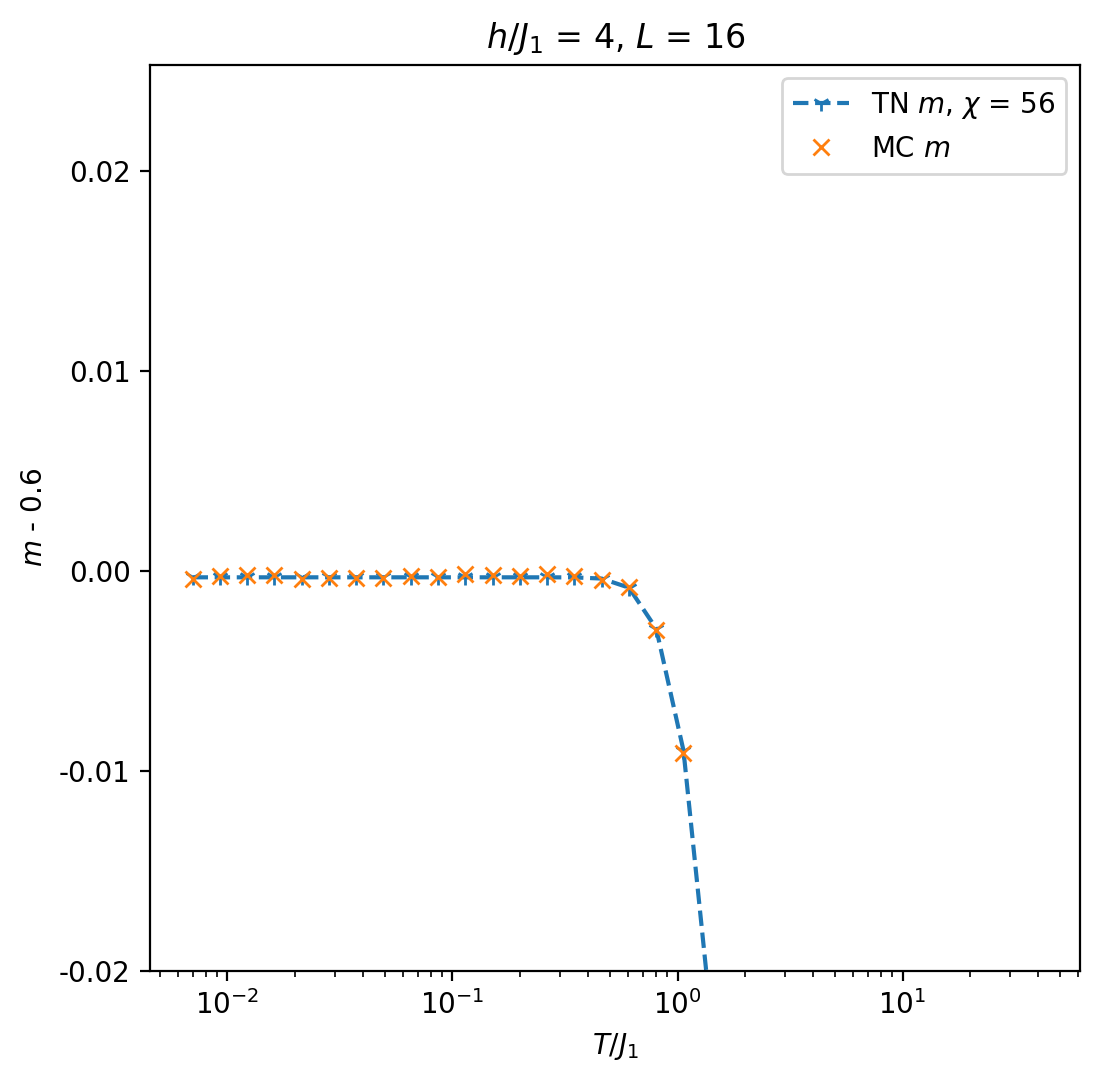

In [17]:
for i in range(n):
    plt.figure(dpi = 200, figsize = (6,6))
    plt.semilogx(TTNdatah0, MTNdatah0,'1--', label="TN $m$, $\chi$ = 56")
    plt.semilogx(temperatures_plots[0], t_h_MeanM[i][:,0], 'x', label="MC $m$")
    plt.legend()
    plt.title(r'$h/J_1$ = 0, $L$ = {0}'.format(L[i]))
    plt.xlabel(r'$T/J_1$')
    plt.ylabel(r'$m$')
    plt.ylim([0,None])
    
    plt.figure(dpi = 200, figsize = (6,6))
    plt.semilogx(TTNdata, MTNdata,'1--', label="TN $m$, $\chi$ = 56")
    plt.semilogx(temperatures_plots[0], t_h_MeanM[i][:,10], 'x', label="MC $m$")
    plt.legend()
    plt.title(r'$h/J_1$ = 2, $L$ = {0}'.format(L[i]))
    plt.xlabel(r'$T/J_1$')
    plt.ylabel(r'$m$')
    plt.ylim([0,None])


    plt.figure(dpi = 200, figsize = (6,6))
    plt.semilogx(TTNdatah4, MTNdatah4-0.6,'1--', label="TN $m$, $\chi$ = 56")
    plt.semilogx(temperatures_plots[0], t_h_MeanM[i][:,20]-0.6, 'x', label="MC $m$")
    plt.legend()
    plt.title(r'$h/J_1$ = 4, $L$ = {0}'.format(L[i]))
    plt.xlabel(r'$T/J_1$')
    plt.ylabel(r'$m$ - 0.6')
    plt.ylim([-0.02,None])

In [ ]:
for i in range(n):
    addsave = "L={0} ".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0}".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])

    fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
    markersize = 4

    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax,hid = 0)
    plt.gca().set_prop_cycle(None)
    
    plt.plot(TTNdatah0, NNTNdatah0, '1--', label = r'TN $c_1$, $\chi = 56$')
    plt.plot(TTNdatah0, N2TNdatah0, '2--', label = r'TN $c_2$, $\chi = 56$')
    plt.plot(TTNdatah0, N3pTNdatah0, '3--',label = r'TN $c_{3||}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')
    plt.plot(TTNdatah0, N3sTNdatah0, 'p--',label = r'TN $c_{3\star}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')

    
    plt.xlabel(r'$T/J_1$')

    plt.ylabel(r"$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$")
    plt.title(r'$h/J_1$ = 0, $L =$'+'{0}'.format(L[i]))

    plt.legend()

In [18]:
TTNdatahB = np.loadtxt(foldername + "Results_Direct4T_15-01-21/resrunsList1_temps.csv", delimiter = ',')
#TTNdatah42 = TTNdatah0[0:32];
MTNdatahB = np.loadtxt(foldername +"Results_Direct4T_15-01-21/resrunsList1_M.csv", delimiter = ',')
NNTNdatahB = np.loadtxt(foldername +"Results_Direct4T_15-01-21/resrunsList1_NN.csv", delimiter = ',')
N2TNdatahB = np.loadtxt(foldername +"Results_Direct4T_15-01-21/resrunsList1_N2.csv", delimiter = ',')
N3pTNdatahB = np.loadtxt(foldername +"Results_Direct4T_15-01-21/resrunsList1_N3p.csv", delimiter = ',')
N3sTNdatahB = np.loadtxt(foldername +"Results_Direct4T_15-01-21/resrunsList1_N3s.csv", delimiter = ',')

False
False
False
False
False


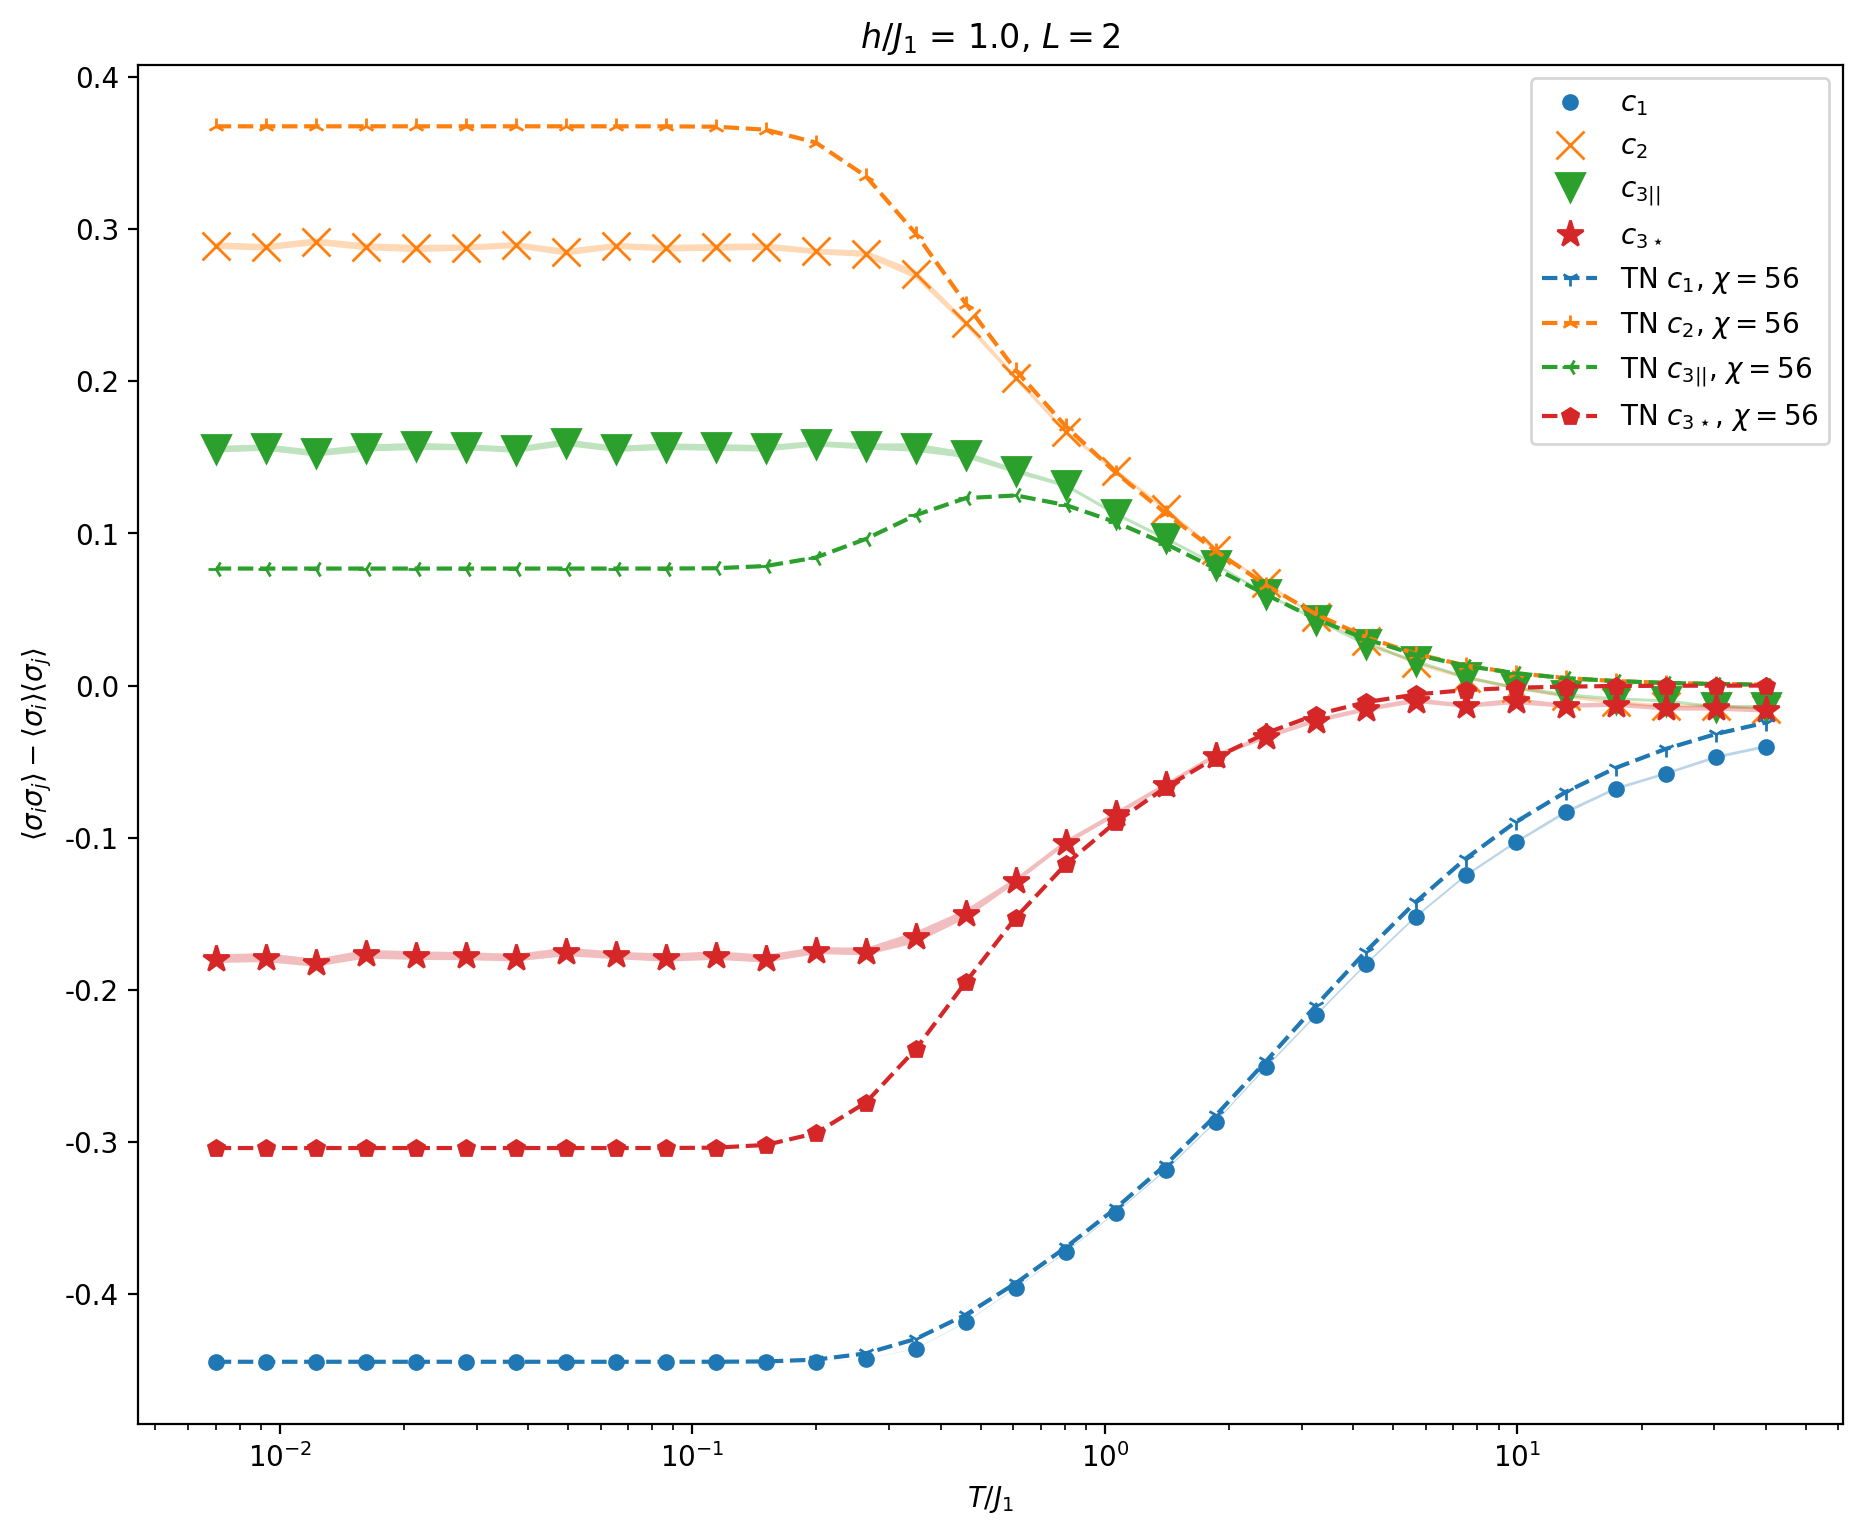

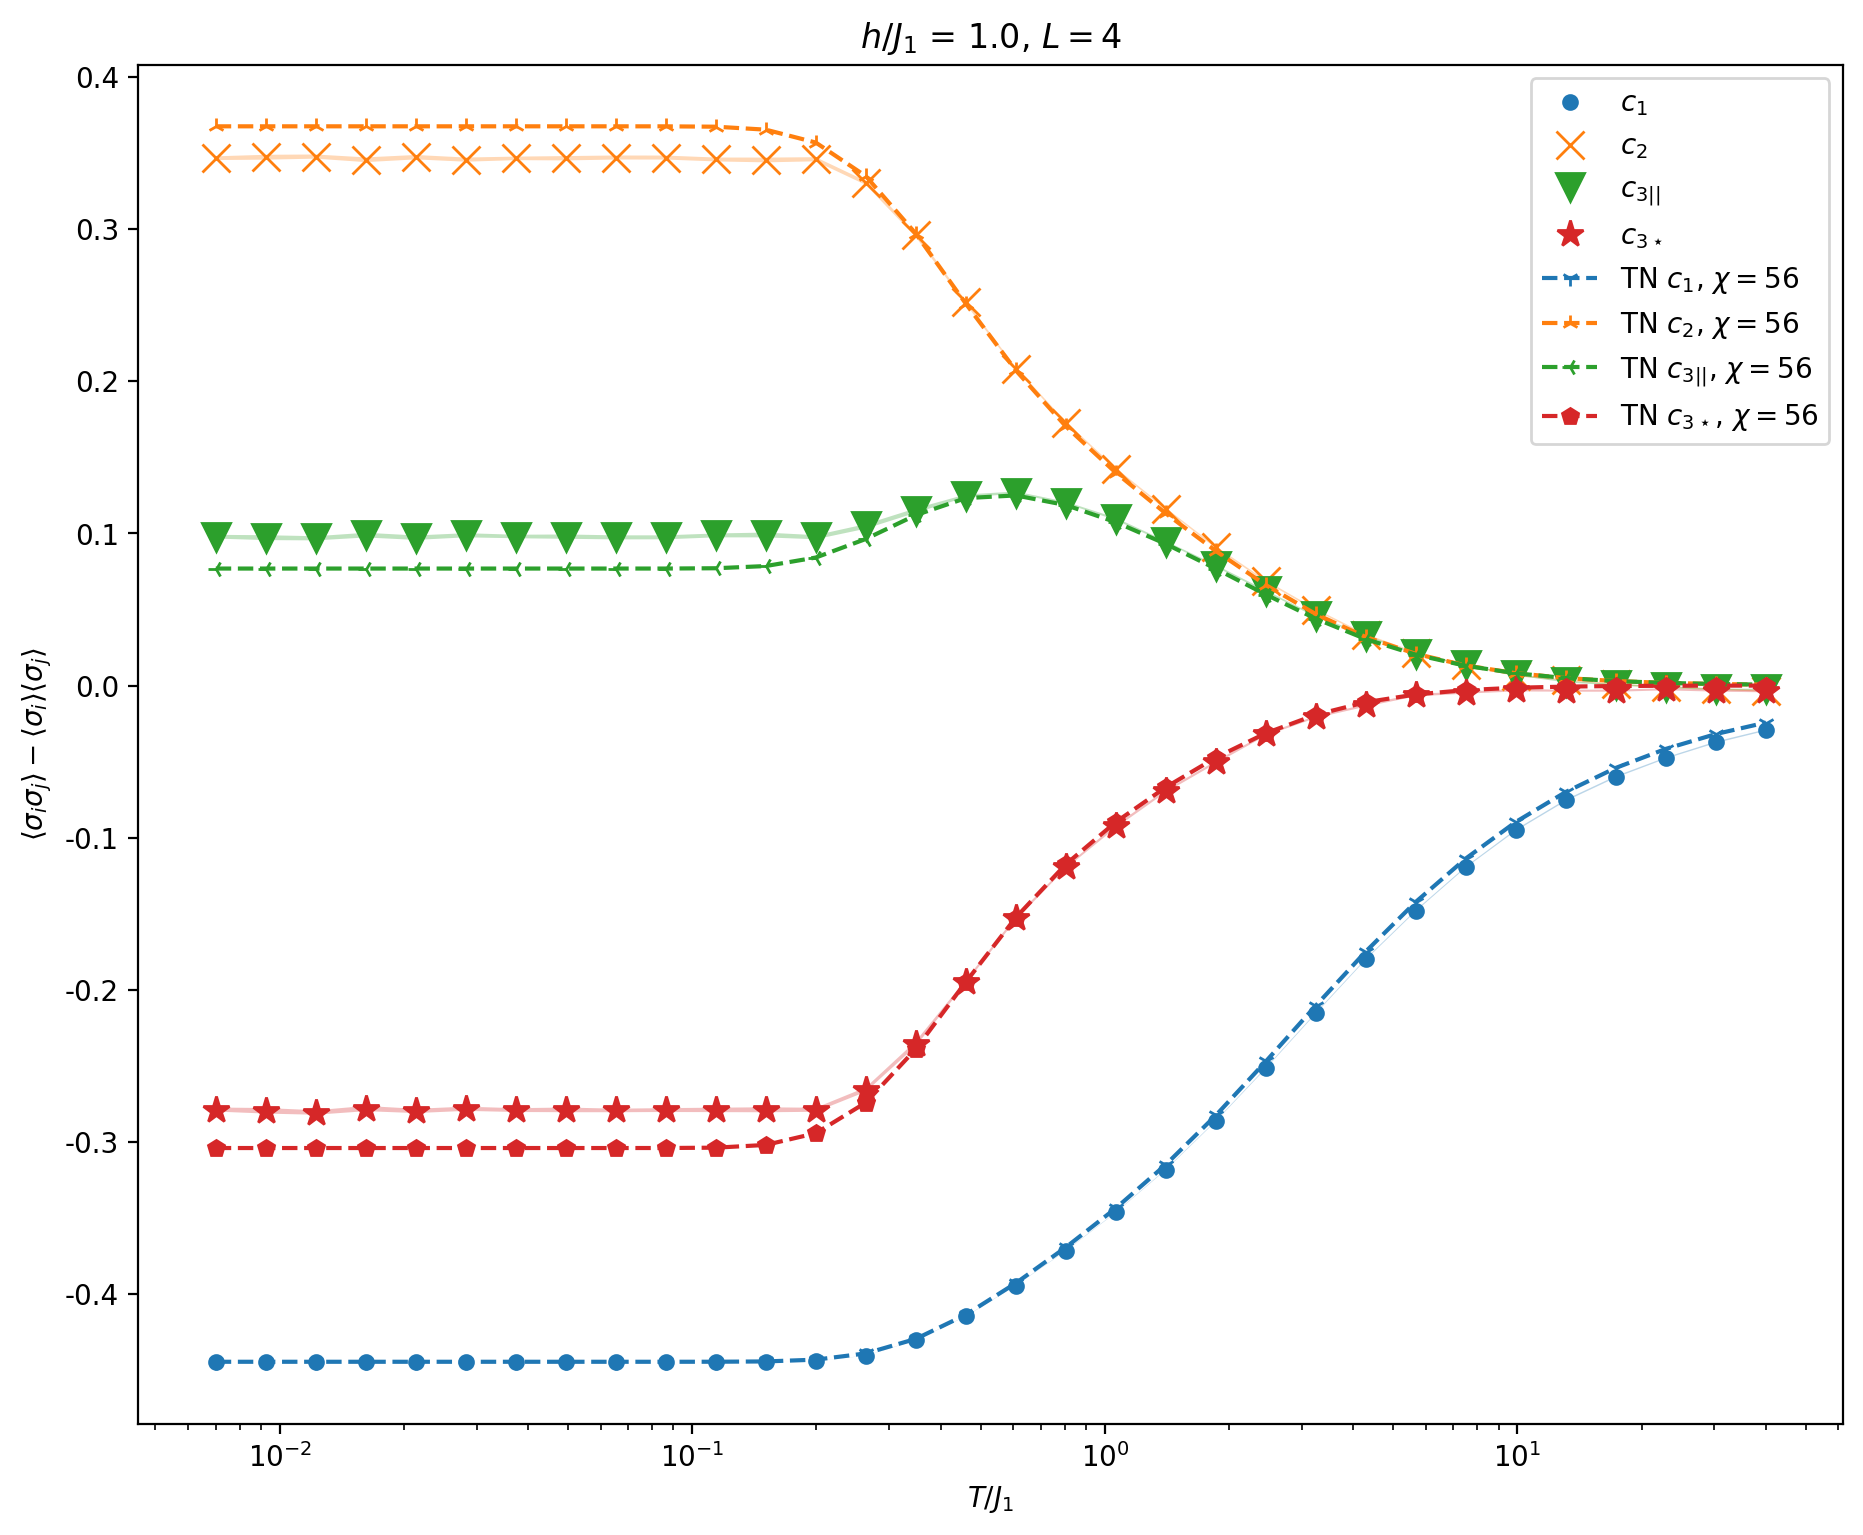

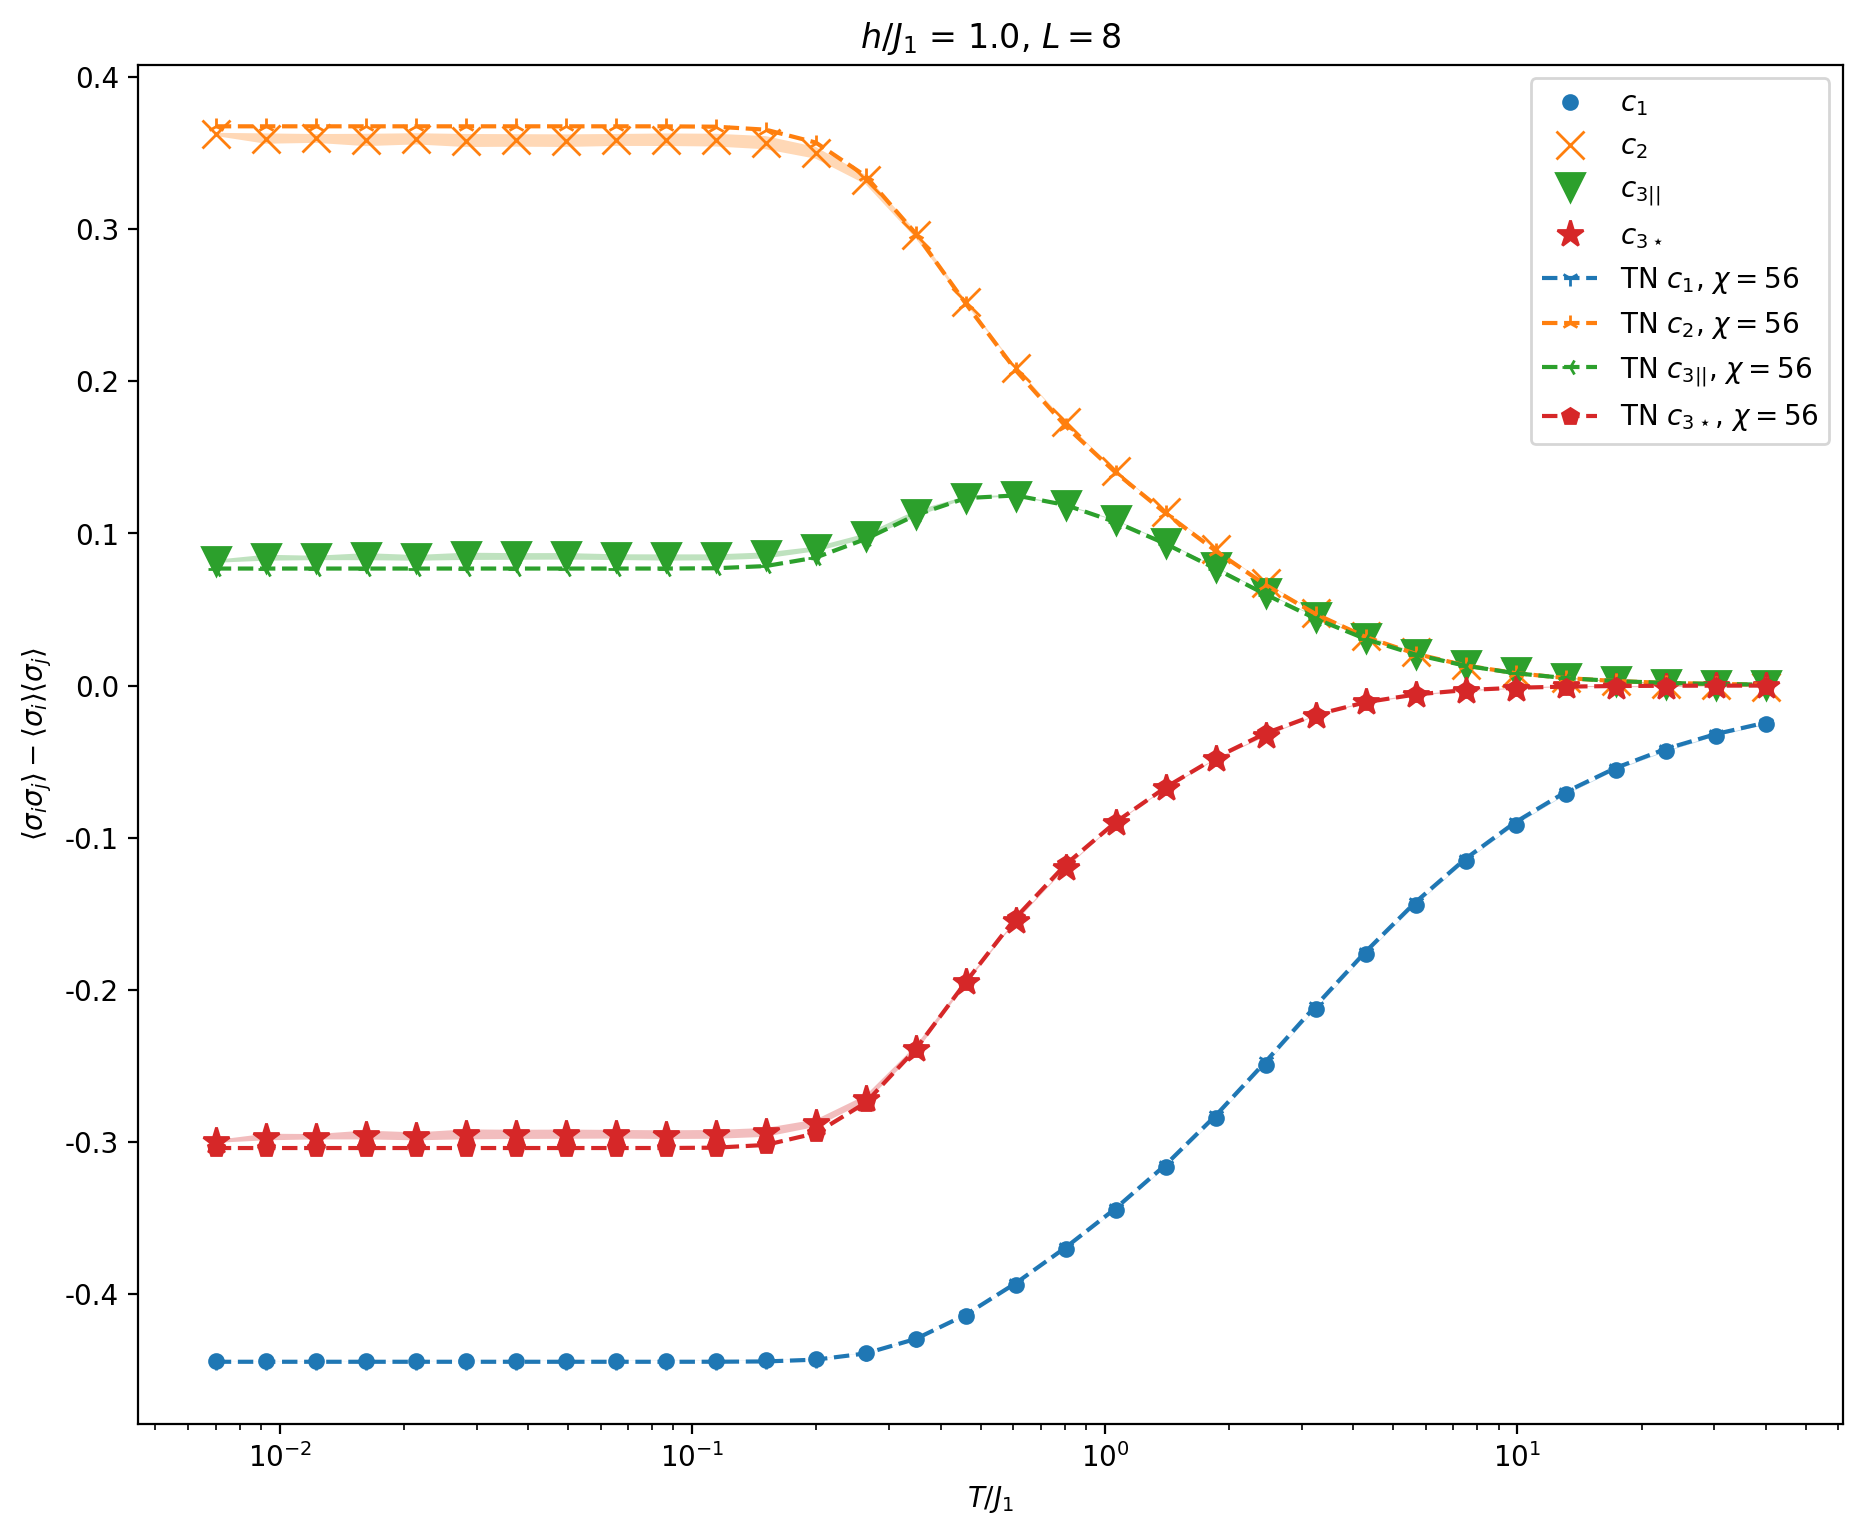

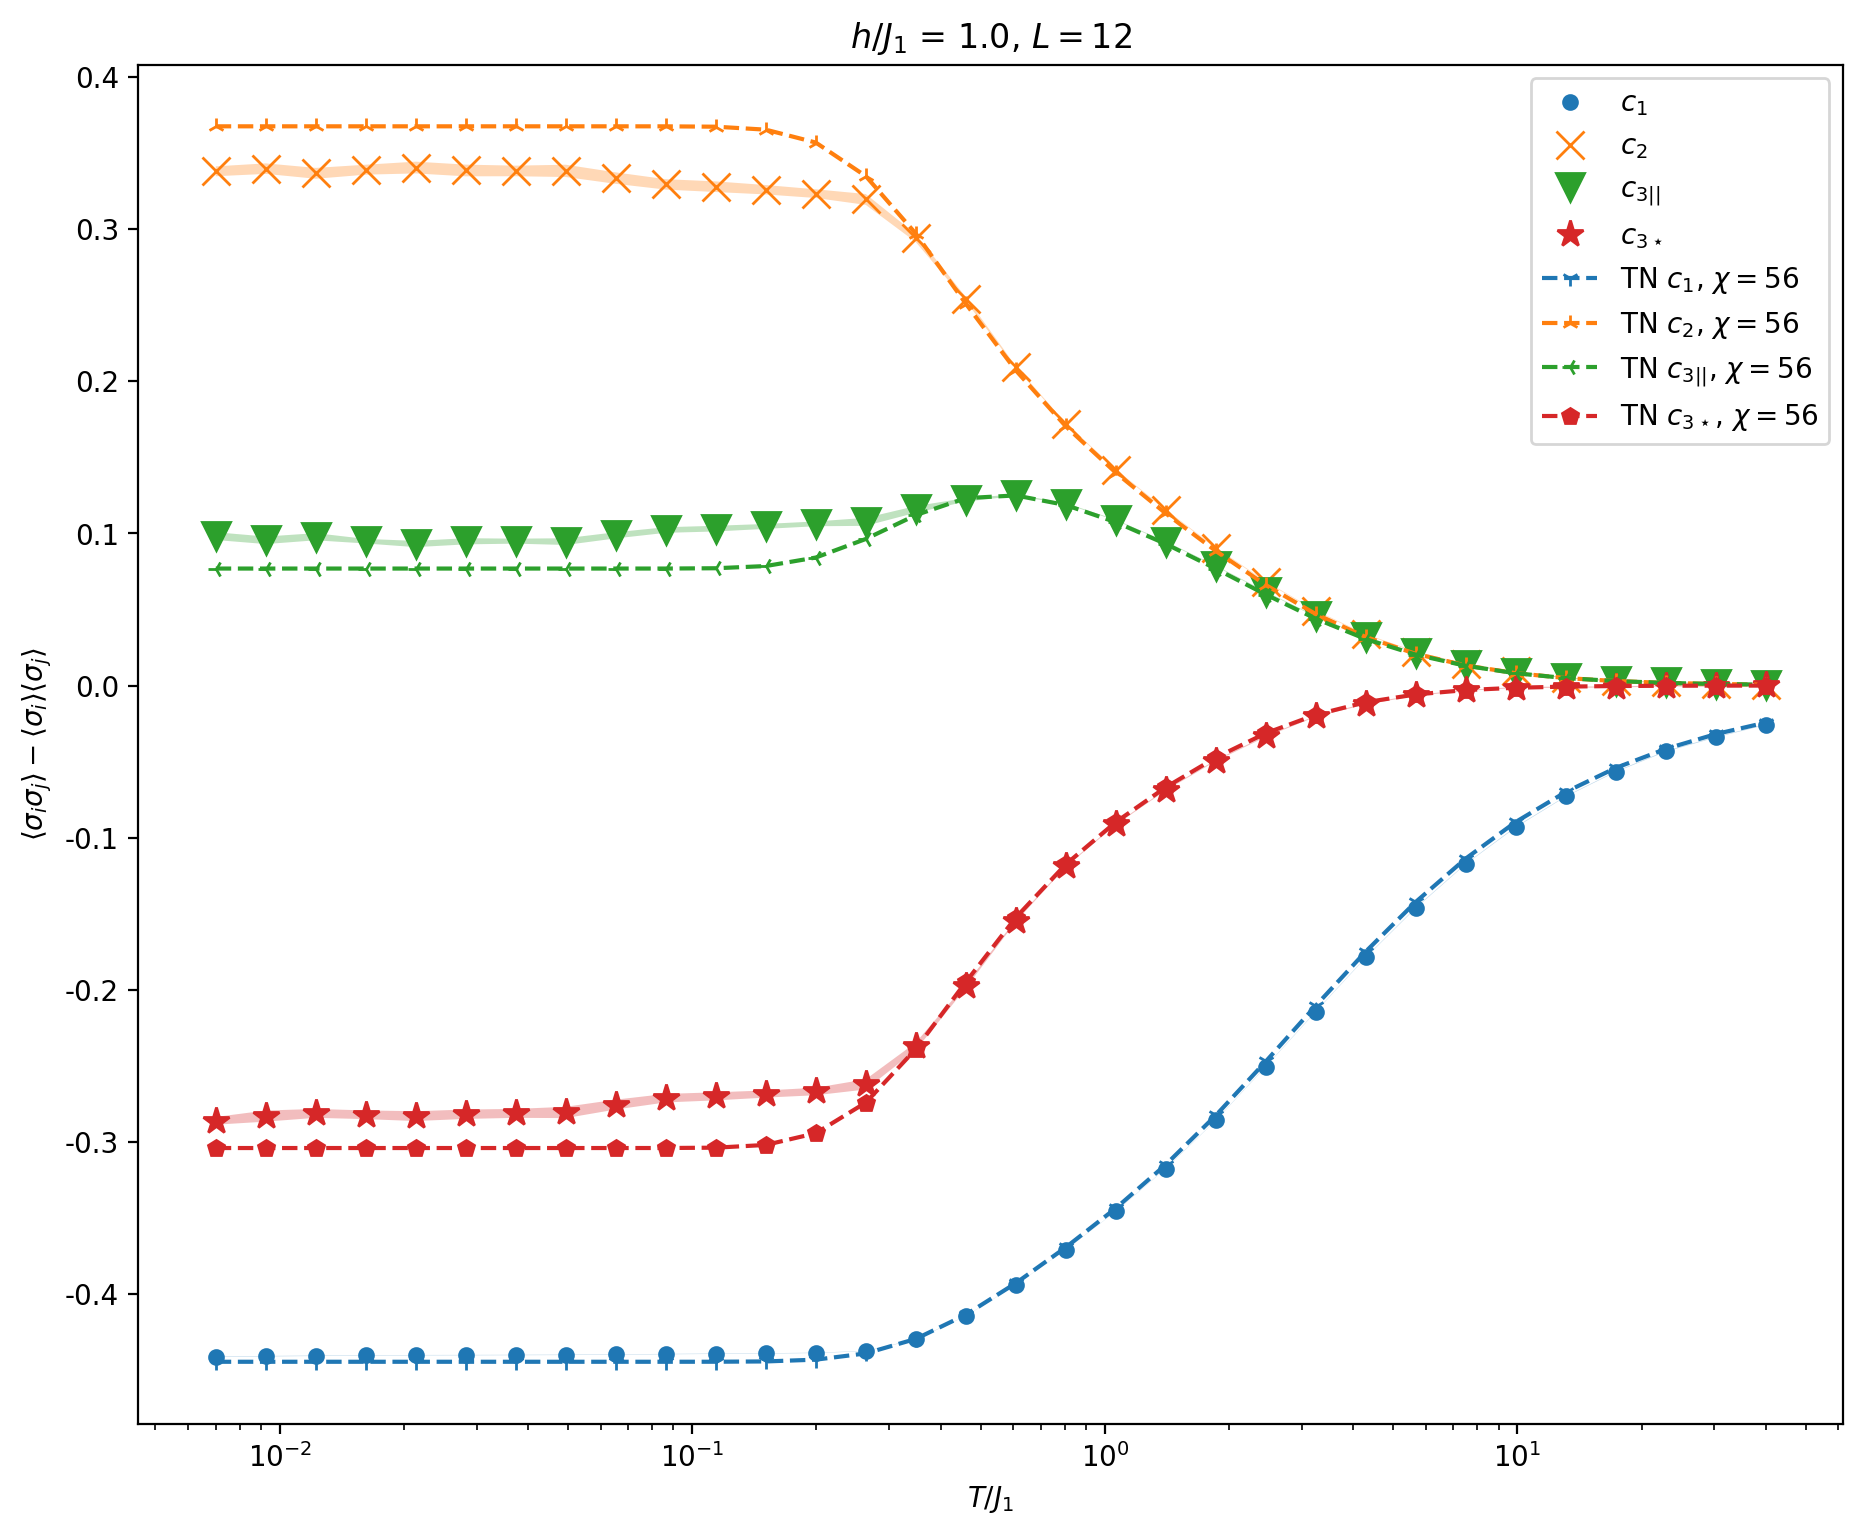

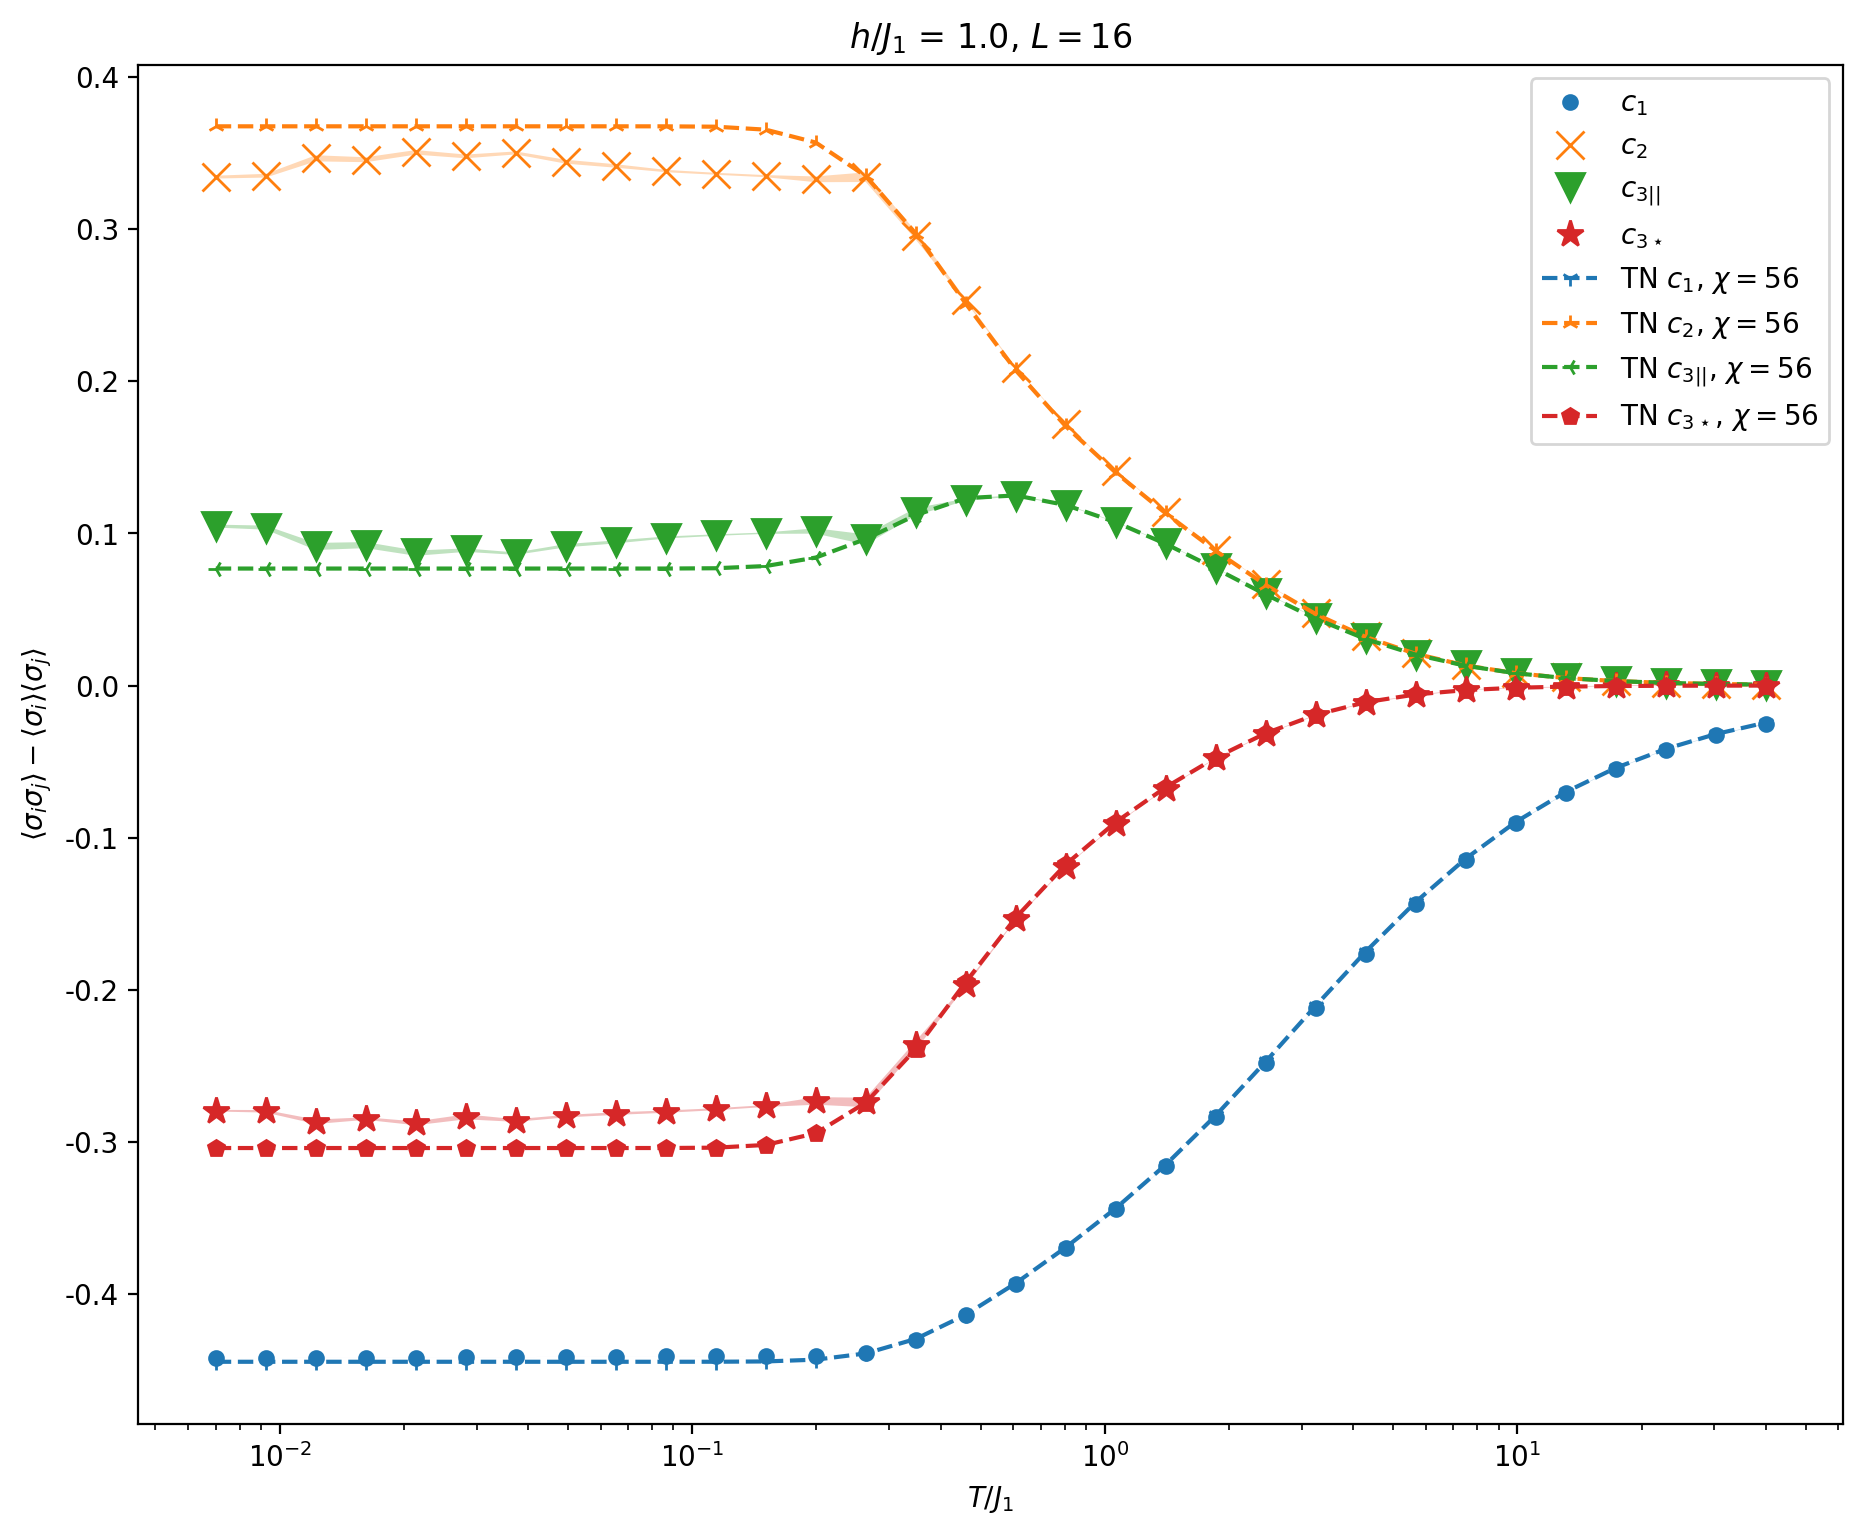

In [22]:
hid = 5
for i in range(n):
    fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
    addsave = "L={0} ".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0}".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])

    markersize = 4

    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax,hid = hid)
    plt.gca().set_prop_cycle(None)
    
    plt.plot(TTNdatahB[64:96], NNTNdatahB[64:96], '1--', label = r'TN $c_1$, $\chi = 56$')
    plt.plot(TTNdatahB[64:96], N2TNdatahB[64:96],'2--', label = r'TN $c_2$, $\chi = 56$')
    plt.plot(TTNdatahB[64:96], N3pTNdatahB[64:96], '3--',label = r'TN $c_{3||}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')
    plt.plot(TTNdatahB[64:96], N3sTNdatahB[64:96], 'p--',label = r'TN $c_{3\star}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')

    
    plt.xlabel(r'$T/J_1$')

    plt.ylabel(r"$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$")
    plt.title(r'$h/J_1$ = ' + '{0}'.format(hfields_plots[0][hid])+', $L =$'+'{0}'.format(L[i]))

    plt.legend()

In [ ]:
for i in range(n):
    addsave = "L={0} ".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0}".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])

    fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
    markersize = 4

    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax,hid = 10)
    plt.gca().set_prop_cycle(None)
    
    plt.plot(TTNdata, NNTNdata, '.', label = r'TN $c_1$, $\chi = 56$')
    plt.plot(TTNdata, N2TNdata, '.', label = r'TN $c_2$, $\chi = 56$')
    plt.plot(TTNdata, N3pTNdata, '.',label = r'TN $c_{3||}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')
    plt.plot(TTNdata, N3sTNdata, '.',label = r'TN $c_{3\star}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')

    plt.gca().set_prop_cycle(None)

    plt.plot(TTNdata, NNTNdata30, '--', label = r'TN $c_1$, $\chi = 30$')
    plt.plot(TTNdata, N2TNdata30, '--', label = r'TN $c_2$, $\chi = 30$')
    plt.plot(TTNdata, N3pTNdata30, '--',label = r'TN $c_{3||}$, $\chi = 30$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')
    plt.plot(TTNdata, N3sTNdata30, '--',label = r'TN $c_{3\star}$, $\chi = 30$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')

    plt.xlabel(r'$T/J_1$')

    plt.ylabel(r"$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$")
    plt.title(r'$h/J_1$ = 2, $L =$'+'{0}'.format(L[i]))

    plt.legend()

In [ ]:
for i in range(n):
    addsave = "L={0} ".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0}".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])

    fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
    markersize = 4

    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax,hid = 20)
    plt.gca().set_prop_cycle(None)
    
    plt.plot(TTNdatah4, NNTNdatah4, '.-', label = r'TN $c_1$, $\chi = 56$')
    plt.plot(TTNdatah4, N2TNdatah4, '.-', label = r'TN $c_2$, $\chi = 56$')
    plt.plot(TTNdatah4, N3pTNdatah4, '.-',label = r'TN $c_{3||}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')
    plt.plot(TTNdatah4, N3sTNdatah4, '.-',label = r'TN $c_{3\star}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')

    plt.gca().set_prop_cycle(None)

    plt.xlabel(r'$T/J_1$')

    plt.ylabel(r"$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$")
    plt.title(r'$h/J_1$ = 4'+ ', L ={0}'.format(L[i]))

    plt.legend()

In [ ]:
for i in range(n):
    addsave = "L={0} ".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0}".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])

    fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
    markersize = 4

    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax,hid = 20)
    plt.gca().set_prop_cycle(None)
    
    plt.plot(TTNdatah4, NNTNdatah4, '.-', label = r'TN $c_1$, $\chi = 56$')
    plt.plot(TTNdatah4, N2TNdatah4, '.-', label = r'TN $c_2$, $\chi = 56$')
    plt.plot(TTNdatah4, N3pTNdatah4, '.-',label = r'TN $c_{3||}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')
    plt.plot(TTNdatah4, N3sTNdatah4, '.-',label = r'TN $c_{3\star}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')

    plt.gca().set_prop_cycle(None)

    plt.xlabel(r'$T/J_1$')

    plt.ylabel(r"$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$")
    plt.title(r'$h/J_1$ = 4'+ ', L ={0}'.format(L[i]))

    plt.legend()

In [ ]:
for i in range(n):
    addsave = "L={0} ".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0}".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])

    fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
    markersize = 4

    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax,hid = 21)
    plt.gca().set_prop_cycle(None)
    
    plt.plot(TTNdatah42, NNTNdatah42, '.-', label = r'TN $c_1$, $\chi = 56$')
    plt.plot(TTNdatah42, N2TNdatah42, '.-', label = r'TN $c_2$, $\chi = 56$')
    plt.plot(TTNdatah42, N3pTNdatah42, '.-',label = r'TN $c_{3||}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')
    plt.plot(TTNdatah42, N3sTNdatah42, '.-',label = r'TN $c_{3\star}$, $\chi = 56$')#plt.plot(4*NNdata2[:,0], NNdata2[:,1], label = r'$c_1$')

    plt.gca().set_prop_cycle(None)

    plt.xlabel(r'$T/J_1$')

    plt.ylabel(r"$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$")
    plt.title(r'$h/J_1$ = 4.2'+ ', L ={0}'.format(L[i]))

    plt.legend()

In [ ]:
i = 0
addsave = "L={0} ".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
addtitle = r"$L$={0}".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])

fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
markersize = 4


#plt.errorbar(TTNdata,t_h_MeanFc[0][:,10,0]-NNTNdata, yerr = [np.sqrt(t_h_varMeanFc[0][:,10,0]),np.sqrt(t_h_varMeanFc[0][:,10,0])], fmt = '.', label = r'TN $c_1$ vs MC $c_1$')
#plt.errorbar(TTNdata,t_h_MeanFc[0][:,10,1]-N2TNdata, yerr = [np.sqrt(t_h_varMeanFc[0][:,10,1]),np.sqrt(t_h_varMeanFc[0][:,10,1])], fmt = 'x', label = r'TN $c_2$ vs MC $c_2$')
#plt.errorbar(TTNdata,t_h_MeanFc[0][:,10,2]-N3pTNdata, yerr = [np.sqrt(t_h_varMeanFc[0][:,10,2]),np.sqrt(t_h_varMeanFc[0][:,10,2])], fmt = 'v', label = r'TN $c_{3||}$ vs MC $c_{3||}$')
#
#plt.gca().set_prop_cycle(None)
#
#plt.errorbar(TTNdata,t_h_MeanFc[1][:,10,0]-NNTNdata, yerr = [np.sqrt(t_h_varMeanFc[1][:,10,0]),np.sqrt(t_h_varMeanFc[1][:,10,0])], fmt = '.', label = r'TN $c_1$ vs MC $c_1$')
#plt.errorbar(TTNdata,t_h_MeanFc[1][:,10,1]-N2TNdata, yerr = [np.sqrt(t_h_varMeanFc[1][:,10,1]),np.sqrt(t_h_varMeanFc[1][:,10,1])], fmt = 'x', label = r'TN $c_2$ vs MC $c_2$')
#plt.errorbar(TTNdata,t_h_MeanFc[1][:,10,2]-N3pTNdata, yerr = [np.sqrt(t_h_varMeanFc[1][:,10,2]),np.sqrt(t_h_varMeanFc[1][:,10,2])], fmt = 'v', label = r'TN $c_{3||}$ vs MC $c_{3||}$')

plt.gca().set_prop_cycle(None)

plt.errorbar(TTNdata,t_h_MeanFc[3][:,10,0]-NNTNdata, yerr = [np.sqrt(t_h_varMeanFc[3][:,10,0]),np.sqrt(t_h_varMeanFc[1][:,10,0])], fmt = '.', label = r'TN $c_1$ vs MC $c_1$')
plt.errorbar(TTNdata,t_h_MeanFc[3][:,10,1]-N2TNdata, yerr = [np.sqrt(t_h_varMeanFc[3][:,10,1]),np.sqrt(t_h_varMeanFc[1][:,10,1])], fmt = 'x', label = r'TN $c_2$ vs MC $c_2$')
plt.errorbar(TTNdata,t_h_MeanFc[3][:,10,2]-N3pTNdata, yerr = [np.sqrt(t_h_varMeanFc[3][:,10,2]),np.sqrt(t_h_varMeanFc[1][:,10,2])], fmt = 'v', label = r'TN $c_{3||}$ vs MC $c_{3||}$')

ax.set_xscale('log')
plt.xlabel(r'$T/J_1$')

plt.ylabel(r"$\Delta(\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle)$")
plt.title(r'$h/J_1$ = 2')

plt.legend()

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
markersize = 4
af.BasicPlotsFirstCorrelations(L, 2, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax, markersize = markersize)

In [ ]:
# Introducing the experimental values for the plots below:
## <sisj>-<si><sj>:
NN1exp = -0.218;
NN1experr = 0.005;
NN1expdev = 0.02;

NN2exp = 0.021;
NN2experr = 0.004;
NN2expdev = 0.02;

NN3pexp = 0.063;
NN3pexperr = 0.005;
NN3pexpdev = 0.02;

NN3sexp = -0.003;
NN3sexperr = 0.005;
NN3sexpdev = 0.02
mexp = -0.193;

rmexpmag = True

if not rmexpmag:
    NN1exp += mexp**2;
    NN2exp += mexp**2;
    NN3pexp += mexp**2;
    NN3sexp += mexp**2;
    

print(NN1exp)
print(NN2exp)
print(NN3pexp)
print(NN3sexp)

In [ ]:
import importlib
importlib.reload(af)

In [ ]:
for i in range(n):
    for hid,h in enumerate(hfields_plots[0]):
        addsave = "L={0}".format(L[i]) + "h={0}".format(h)+"J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
        addtitle = r"$L$={0} ".format(L[i])+ r", $h/J_1$ = {0} ".format(h)+ r", $J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
        af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                       t_h_varMeanFc, foldername, 
                                       results_foldername, filenamelist,
                                       tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                       addtitle = addtitle,markersize=4,
                                       save = False, hid = hid)
        plt.gca().set_prop_cycle(None)
        Tmin = min(temperatures_plots[i])
        Tmax = max(temperatures_plots[i])
        plt.fill_between([Tmin,Tmax],[NN1exp-NN1expdev,NN1exp-NN1expdev],[NN1exp+NN1expdev, NN1exp+NN1expdev], alpha = 0.2, label = r'$c_1^{E}$')
        plt.fill_between([Tmin,Tmax],[NN2exp-NN2expdev,NN2exp-NN2expdev],[NN2exp+NN2expdev, NN2exp+NN2expdev], alpha = 0.2,  label = r'$c_2^{E}$')
        plt.fill_between([Tmin,Tmax],[NN3pexp-NN3pexpdev,NN3pexp-NN3pexpdev],[NN3pexp+NN3pexpdev, NN3pexp+NN3pexpdev], alpha = 0.2,  label = r'$c_{3||}^{E}$')
        plt.fill_between([Tmin,Tmax],[NN3sexp-NN3sexpdev, NN3sexp-NN3sexpdev],[NN3sexp+NN3sexpdev, NN3sexp+NN3sexpdev], alpha = 0.2,label = r'$c_{3\star}^{E}$')
        plt.xlim([temperatures_plots[0][0], 40])
        plt.ylim([-0.5, 1])
        plt.yticks(np.arange(-0.5,1,0.1))
        plt.legend(loc = 'lower left')
        plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))

In [ ]:
foldername + results_foldername

In [ ]:
np.savetxt("./" + foldername + results_foldername + '/Temperaturesh0_L16.txt', temperatures_plots[4])
np.savetxt("./" + foldername + results_foldername + '/Correlationsh0_L16.txt', t_h_MeanFc[4][:,0,:])
np.savetxt("./" + foldername + results_foldername + '/Magnetisationh0_L16.txt', t_h_MeanM[4][:,0])
np.savetxt("./" + foldername + results_foldername + '/ErrMagnetisationh0_L16.txt', t_h_varMeanM[4][:,0])
np.savetxt("./" + foldername + results_foldername + '/ErrCorrelationsh0_L16.txt', t_h_varMeanFc[4][:,0,:])
np.savetxt("./" + foldername + results_foldername + '/Temperaturesh2_L16.txt', temperatures_plots[4])
np.savetxt("./" + foldername + results_foldername + '/Correlationsh2_L16.txt', t_h_MeanFc[4][:,10,:])
np.savetxt("./" + foldername + results_foldername + '/Magnetisationh2_L16.txt', t_h_MeanM[4][:,10])
np.savetxt("./" + foldername + results_foldername + '/ErrMagnetisationh2_L16.txt', t_h_varMeanM[4][:,10])
np.savetxt("./" + foldername + results_foldername + '/ErrCorrelationsh2_L16.txt', t_h_varMeanFc[4][:,10,:])
np.savetxt("./" + foldername + results_foldername + '/Temperaturesh4_L16.txt', temperatures_plots[4])
np.savetxt("./" + foldername + results_foldername + '/Correlationsh4_L16.txt', t_h_MeanFc[4][:,20,:])
np.savetxt("./" + foldername + results_foldername + '/Magnetisationh4_L16.txt', t_h_MeanM[4][:,20])
np.savetxt("./" + foldername + results_foldername + '/ErrMagnetisationh4_L16.txt', t_h_varMeanM[4][:,20])
np.savetxt("./" + foldername + results_foldername + '/ErrCorrelationsh4_L16.txt', t_h_varMeanFc[4][:,20,:])
np.savetxt("./" + foldername + results_foldername + '/Temperaturesh42_L16.txt', temperatures_plots[4])
np.savetxt("./" + foldername + results_foldername + '/Correlationsh42_L16.txt', t_h_MeanFc[4][:,21,:])
np.savetxt("./" + foldername + results_foldername + '/Magnetisationh42_L16.txt', t_h_MeanM[4][:,21])
np.savetxt("./" + foldername + results_foldername + '/ErrMagnetisationh42_L16.txt', t_h_varMeanM[4][:,21])
np.savetxt("./" + foldername + results_foldername + '/ErrCorrelationsh42_L16.txt', t_h_varMeanFc[4][:,21,:])

In [ ]:
t_h_MeanFc[2].shape

In [ ]:
kw = {'rmmag': rmmag}
t_h_MeanSs, t_h_varMeanSs, t_h_MeanCorr, t_h_errCorrEstim = \
 af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps[0:4], stat_hfields, nb, t_h_MeanM, **kw)

In [ ]:
t_h_MeanCorr

In [ ]:
### COMPUTING CORRELATIONS FROM <SISJ> AND <SI> and plotting in 2D
ploth = False
if not ploth:
    tid = 0
    hid = 0
    rid = tid
else:
    tid = 9
    hid = 15
    rid = hid

#[corr, errcorr, maxerr] = af.PrepPlot2DCorrelations(rid, n, 
#                                                t_h_MeanCorr,
#                                                t_h_errCorrEstim,
#                                                t_h_MeanSi,
#                                                hfields_plots,
#                                                temperatures_plots,\
#                                                ploth = ploth)
print("t = ",temperatures_plots[0][tid])
print("h = ",hfields_plots[0][hid])

In [ ]:
af.PlotFirstCorrelations(0, L,foldername, results_foldername, 
                         hfields_plots, temperatures_plots,
                         t_h_MeanCorr, t_h_errCorrEstim, sref,\
                         distmax = 2, ploth = ploth,
                         plotFirst = True, t_h_MeanFc = t_h_MeanFc)
plt.plot([1e-3,60],[-0.179, -0.179])
plt.fill_between([1e-3,60],[-0.2, -0.2], [-0.157, -0.157], alpha = 0.2)

In [ ]:
for i in range(n):
    addsave = "L={0}".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0} ".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
    
    figsize=(11,9)
    dpi = 200
    tmin = 0
    tmax = 31
    plt.figure(figsize=figsize, dpi = dpi)
    for hid,h in enumerate(hfields_plots[0]):
        plt.semilogx(temperatures_plots[i][tmin:tmax],t_h_MeanFc[i][tmin:tmax,hid,1]-t_h_MeanFc[i][tmin:tmax,hid,2],label = r'$h/J_1$={0}'.format(h))
        plt.fill_between(temperatures_plots[i][tmin:tmax],
                        t_h_MeanFc[i][tmin:tmax,hid,1]-t_h_MeanFc[i][tmin:tmax,hid,2]-2*np.sqrt(t_h_varMeanFc[i][tmin:tmax,hid,2]),
                        t_h_MeanFc[i][tmin:tmax,hid,1]-t_h_MeanFc[i][tmin:tmax,hid,2]+2*np.sqrt(t_h_varMeanFc[i][tmin:tmax,hid,2]), alpha = 0.2)
    plt.title(addtitle)
    plt.xlabel(r"$T/J_1$")
    plt.ylabel(r"$\Delta(\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle)$")
    plt.grid(which='both')
    plt.legend()

In [ ]:
 t_h_MeanFrustratedTriangles,t_h_varMeanFrustratedTriangles = \
    af.LoadFrustratedTriangles(foldername, filenamelist,listfunctions,
                               stat_temps, stat_hfields, nb, **kw)

In [ ]:
np.linspace(0,4.2,22)

In [ ]:
af.BasicPlotsTriangles(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanFrustratedTriangles,
                        t_h_varMeanFrustratedTriangles, **kw)
plt.plot([1e-3, 40],[0.116, 0.116])
plt.fill_between([1e-3,40],[0.09,0.09],[0.141,0.141],alpha = 0.2)

In [ ]:
import importlib
importlib.reload(af)
import DualwormFunctions as dw

In [ ]:
ids2walker = idswalker

In [ ]:
# Plot the lowest temperature state to get an idea
t_spinstates, t_states, t_charges = af.LoadStates(foldername, filenamelist, L, nh)
latsize = t_spinstates[0][0].size
[d_ijl, ijl_d, s_ijl, ijl_s, d_2s, s2_d, d_nd, d_vd, d_wn,
     sidlist, didlist, c_ijl, ijl_c, c2s, csign] =\
    dw.latticeinit(L[0])
print(ids2walker[0][0,0])

In [ ]:
Lp = L[0]
state = t_states[0][ids2walker[0][1,0]]
spinstate = t_spinstates[0][ids2walker[0][1,0]]
#chargestate = t_charges[0][ids2walker[0][0,0]]

In [ ]:
kdraw.plotstate(0, Lp, d_ijl, ijl_s, sidlist, didlist, s2_d, [state], [spinstate],
                dim_node_color = 'orange', dim_color ='orange', 
                spin_up_color = 'blue', spin_down_color = 'red')
#kdraw.plot_honeycomb_chargestate(chargestate, ijl_c,
#                                 L,2,c1_color = 'black', c2_color = 'green',
#                                 c3_color = 'red', c4_color = 'black', uponly=True)
plt.legend()

In [ ]:
plt.plot(hfields_plots[0][0:19], t_h_MeanE[0][0,0:19]+2/3 + 1/3*np.array(hfields_plots[0])[0:19])